CREDIT SCORING ASSIGNMENT

This project is majorly based on Statistical approach to assess credit risk. A little bit of judgemental approach in this project.
The major purpose of the project is to develop an application based credit scoring scorecard.
It has two datasets available. Accepts and Rejects.
Accepts has clients whose loan was accepted.
Reject has clients whose loan was rejected.
In this project firstly Accepts Dataset will be analyzed in order to find out the scorecard for all the people whose loan got accepted.
Then we will search for best features available in the Rejects datasets through reject inference approach
Then we will combine both the datasets and develop a scorecard.

Three different classification models will be used to determien which is the best model for making the scorecard. They are:
1. Linear Regression
2. Logistic Regression
3. Decision Tree

In [1]:
#Importing necessary packages
install.packages("readxl")
install.packages("Amelia")
install.packages("imputeTS")
library(tidyr)
library(dplyr)
library(ggplot2)
library(tidyr)
library(readxl)
library(magrittr)
library(graphics)
library(lattice)
library(Amelia)
library(Hmisc)
library(imputeTS)

Installing package into 'C:/Users/kgupta/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kgupta\AppData\Local\Temp\RtmpkrSyed\downloaded_packages


Warning message:
"package 'tidyr' was built under R version 3.6.1"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.1"Warning message:
"package 'readxl' was built under R version 3.6.3"

In [212]:
# READING IN THE DATASET ON WHICH ANALYSIS HAS TO BE PERFORMED
Accepts <- read_excel("C:/Users/kgupta/Desktop/Credit scoring/ACCEPTS.xlsx")
Accepts

ID,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,Days_late,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio,Default_45
250263,1,1,11,5,6,7,1,2,0,1,0,NA,1.43851768,-0.25908469,1.78103991,0.86026906,0.5139798,0
250290,1,2,6,4,5,1,1,2,1,1,0,1.4981826,0.20481141,0.38331185,1.10716265,-0.71824919,1.7965902,0
250249,2,3,11,5,7,7,1,2,1,1,0,-0.2417306,-0.85265110,-0.73242952,1.40666366,1.12292973,-0.7686307,0
249516,3,3,10,4,2,4,1,2,0,1,168,NA,-0.67640735,-0.05734964,0.95741215,-1.70248171,0.5139798,1
249827,1,3,5,2,4,4,1,3,0,1,0,NA,-0.41204172,-0.57464791,-0.39034236,0.91007667,-0.7686307,0
250329,1,3,11,2,5,4,3,4,0,2,0,NA,0.55729892,-0.21062320,-0.39034236,-0.38449560,0.5139798,0
250196,2,4,11,5,7,7,3,1,1,1,0,0.5909421,-0.85265110,-0.67495193,1.25691315,-0.78955496,-0.7686307,0
250358,1,3,12,3,3,5,1,3,0,2,0,NA,-0.46491485,-0.58028297,-0.46521761,0.50352734,-0.7686307,0
250375,2,5,11,5,1,7,1,1,0,1,336,NA,0.02856766,-0.70988929,1.40666366,1.06226661,-0.7686307,1
250415,3,3,14,1,4,4,3,1,0,1,0,NA,-0.23579797,-0.76623986,-0.31546711,1.02395306,-0.7686307,0


In [213]:
# READING IN THE DATASET ON WHICH ANALYSIS HAS TO BE PERFORMED
Rejects <- read_excel("C:/Users/kgupta/Desktop/Credit scoring/REJECTS.xlsx")
Rejects


ID,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio
305932,3,3,14,2,1,5,1,1,1,1,-0.03045546,-0.32391985,-0.60544913,-1.06421961,1.02821012,-0.7686307
305764,1,4,7,1,6,4,1,2,1,1,0.71522164,5.66836774,1.29957219,0.80766165,1.08177814,1.7965902
305971,1,4,10,4,5,4,1,4,1,3,0.76493345,-0.75078221,0.43402737,-0.39034236,-0.96941579,1.7965902
305664,1,5,14,2,2,5,3,3,1,1,-1.34781834,-0.85265110,-0.49012205,-0.98934436,1.04630263,-0.7686307
305639,1,4,15,1,5,4,1,3,1,2,1.63489006,3.20095521,0.56137967,0.58303590,0.08846388,1.7965902
305854,3,3,10,1,4,5,3,1,1,1,0.97620862,0.29293329,-0.50590021,0.05890915,1.02182453,-0.7686307
306018,1,5,10,4,2,4,3,>4,1,1,-0.45300582,-0.32391985,0.32019921,-1.21397011,-1.17730228,1.7965902
305910,1,3,10,4,3,4,3,3,1,1,-0.17959088,0.55729892,0.15903657,-1.13909486,-0.24401259,0.5139798
305802,1,4,2,2,6,4,1,2,0,1,NA,-0.85265110,-0.62085538,0.73278640,-0.05308340,-0.7686307
306025,1,3,10,4,5,4,1,2,1,3,1.23719561,-0.77369390,-0.08439791,0.35841015,-1.02220335,0.5139798


In [214]:
#some general details about the datasets
str(Accepts)
str(Rejects)

Classes 'tbl_df', 'tbl' and 'data.frame':	10000 obs. of  19 variables:
 $ ID                 : num  250263 250290 250249 249516 249827 ...
 $ V1                 : num  1 1 2 3 1 1 2 1 2 3 ...
 $ V2                 : num  1 2 3 3 3 3 4 3 5 3 ...
 $ V3                 : num  11 6 11 10 5 11 11 12 11 14 ...
 $ V4                 : num  5 4 5 4 2 2 5 3 5 1 ...
 $ V5                 : num  6 5 7 2 4 5 7 3 1 4 ...
 $ V6                 : num  7 1 7 4 4 4 7 5 7 4 ...
 $ V7                 : num  1 1 1 1 1 3 3 1 1 3 ...
 $ V8                 : chr  "2" "2" "2" "2" ...
 $ Has_FICO           : num  0 1 1 0 0 0 1 0 0 0 ...
 $ Business_channel   : num  1 1 1 1 1 2 1 2 1 1 ...
 $ Days_late          : num  0 0 0 168 0 0 0 0 336 0 ...
 $ FICO_Score         : num  NA 1.498 -0.242 NA NA ...
 $ Loan_amount        : num  1.439 0.205 -0.853 -0.676 -0.412 ...
 $ Monthly_income     : num  -0.2591 0.3833 -0.7324 -0.0573 -0.5746 ...
 $ Age                : num  1.781 1.107 1.407 0.957 -0.39 ...
 $ Gearing_coe

ACCEPTS DATA

Visual exploration of data (Accepts Data)
This visualization is performed on raw data without any preprocessing in order to get some general insights about the data. 
For this process not all the variables are important in the Accepts dataset, hence we will subset only those varibales which are important 
They will be stored in the variable called as "sele_var". They comprise of Has_FICO, Business_channel, Loan_amount, Monthly_income, Age, Default_45
It is important to analyze these variables as they have a strong meaning with the target variable i.e. Default_45.

If a person has a FICO score , it clearly indicates that the customer has some credit worthiness based on his score

Analysis of business channels is also important as the bank can keep a record that whether a person who is applying for a loan is applying through a broker , a partner bank or directlt through the bank.

Loan amount , Age and monthly income are important factors as they will help the bank understand about the financial status , the demand of money as well as the age of the person who is applying for the loan.

Since our main focus is on visualizing univariate data, several visualizing techniques used for univariate data visualization will be used which are as follows : 
1.Histogram plots
2.Missing Plot


In [30]:
#Seperate dataframe for variables only required for visualization
sele_var <- Accepts[,c("Has_FICO", "Business_channel","Loan_amount","Monthly_income","Age","Default_45")]

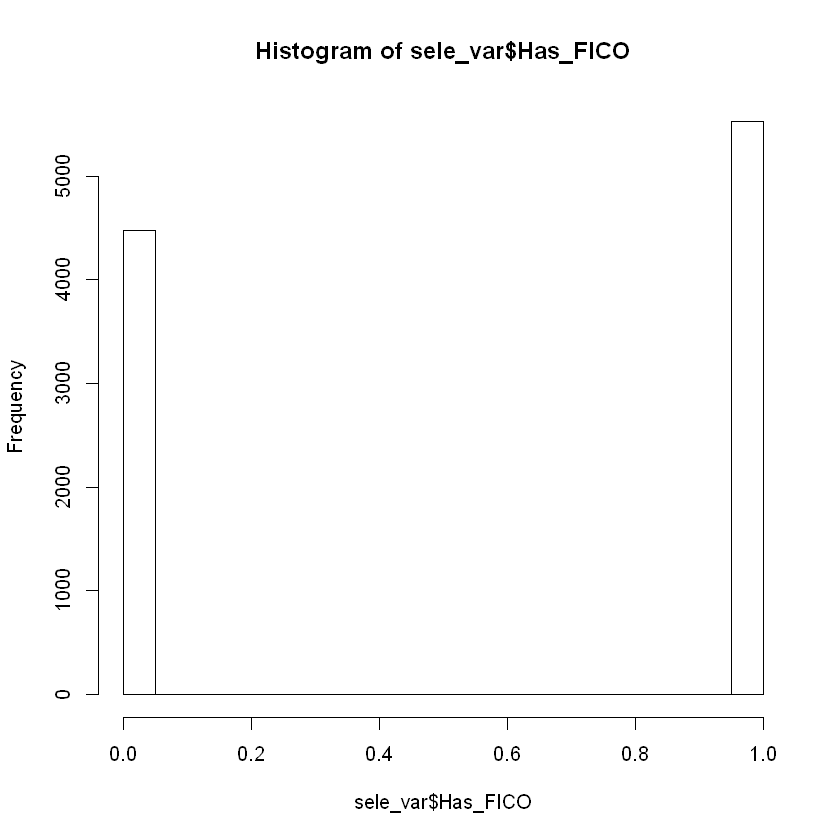

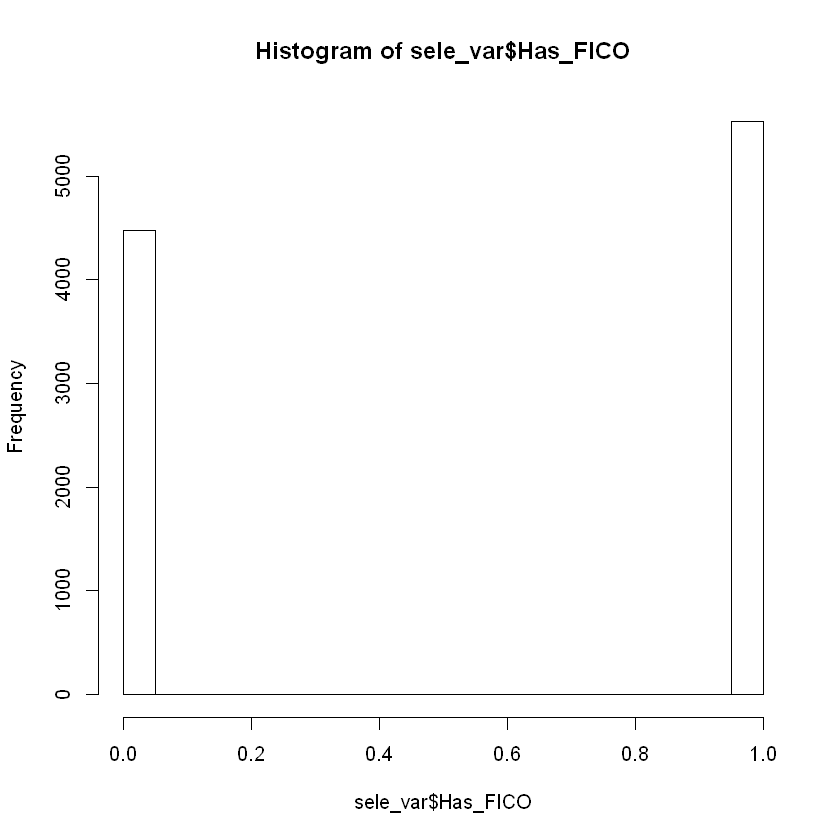

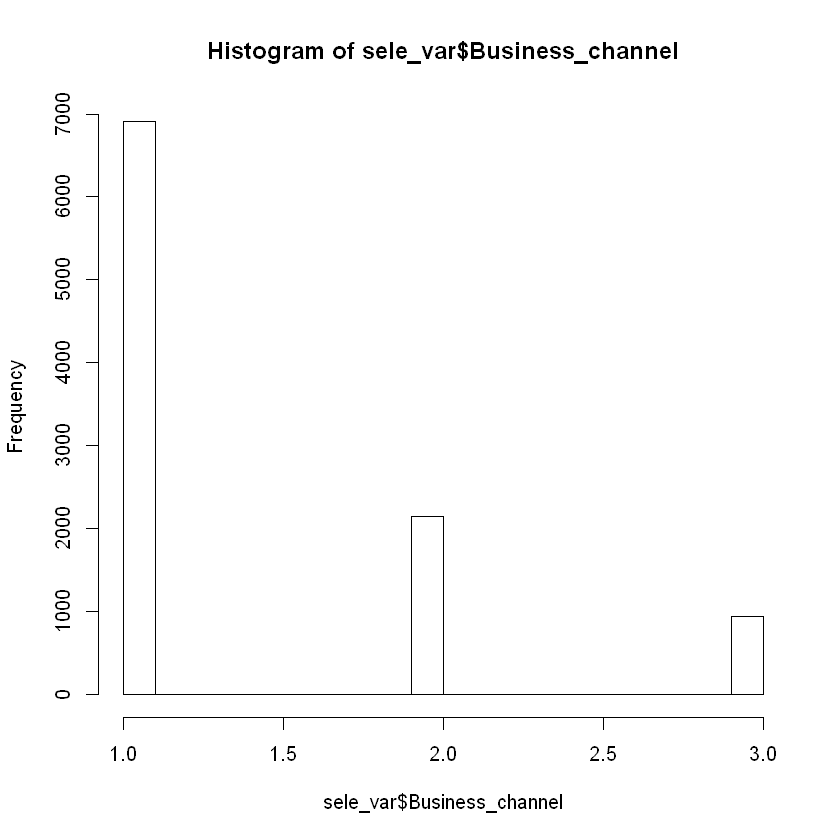

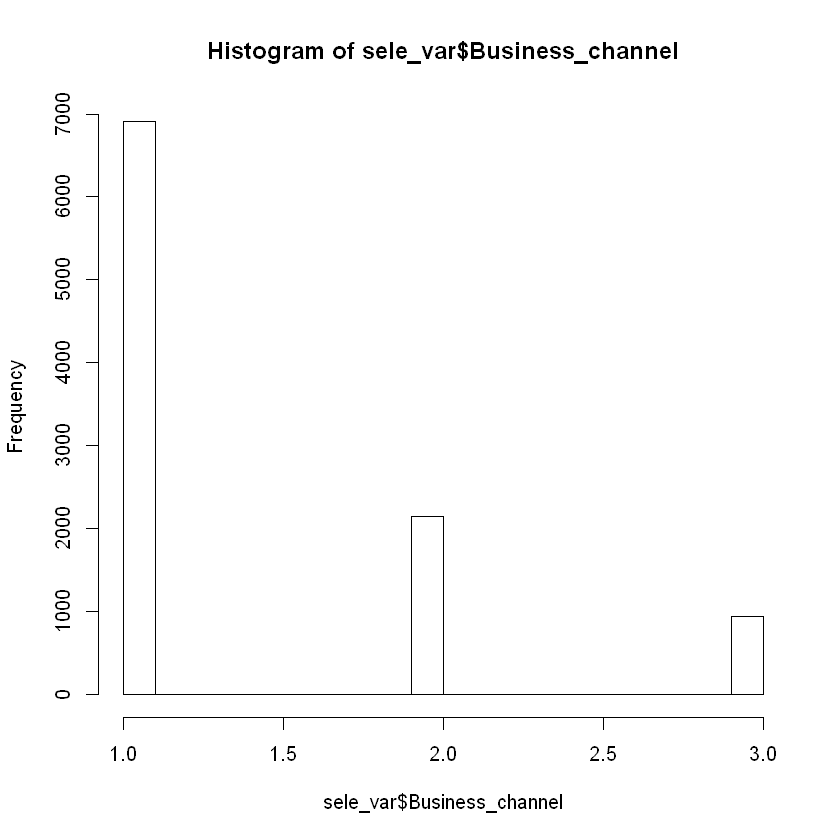

In [66]:
# Histogram for selected variables from the accepts dataset
h <- hist(sele_var$Has_FICO)
plot(h)
h1 <- hist(sele_var$Business_channel)
plot(h1)


As per the results of Histogram
Maximum accepted customers have a FICO score which indicates good credit worthiness.
    Maximum customers apply for the loan directly from the financial institution s compared to applying through a broker or a partner

In [58]:
#CALCULATE STATISTICS FOR AGE, LOAN AMOUNT AND MONTHLY INCOME
describe(sele_var$Age)
describe(sele_var$Loan_amount)
describe(sele_var$Monthly_income)

sele_var$Age 
        n   missing  distinct      Info      Mean       Gmd       .05       .10 
    10000         0        49     0.999 -0.003147      1.17   -1.4386   -1.2888 
      .25       .50       .75       .90       .95 
  -0.9145   -0.1657    0.8825    1.5564    1.7062 

lowest : -1.588346 -1.513471 -1.438596 -1.363721 -1.288845
highest:  1.706165  1.781040  1.855915  1.930790  2.005666

sele_var$Loan_amount 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0      776    0.995  0.03416   0.9651  -0.8527  -0.8527 
     .25      .50      .75      .90      .95 
 -0.6412  -0.3239   0.3811   1.0860   1.9717 

lowest : -1.117017 -1.102817 -1.097982 -1.090580 -1.085469
highest:  5.509748  5.580246  5.668368  5.756490  5.844611

sele_var$Monthly_income 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   10000        0     2317        1  -0.1193   0.6997 -0.80461 -0.68735 
     .25      .50      .75      .90      .95 
-0.53633 -0.35939  0.05648  0.66281  1.18244 

lowest : -0.9848801 -0.9837531 -0.9826261 -0.9814991 -0.9803720
highest: 12.6609750 14.3875566 21.2657077 41.2126840 43.8420018

As per the above statistics it is clearly visible that customers applying for the loan have diverse age backgrouunds, have both high and low monthly income and have extremely different demands for loan .

Warning message:
"Unknown or uninitialised column: 'arguments'."Warning message:
"Unknown or uninitialised column: 'arguments'."Warning message:
"Unknown or uninitialised column: 'imputations'."

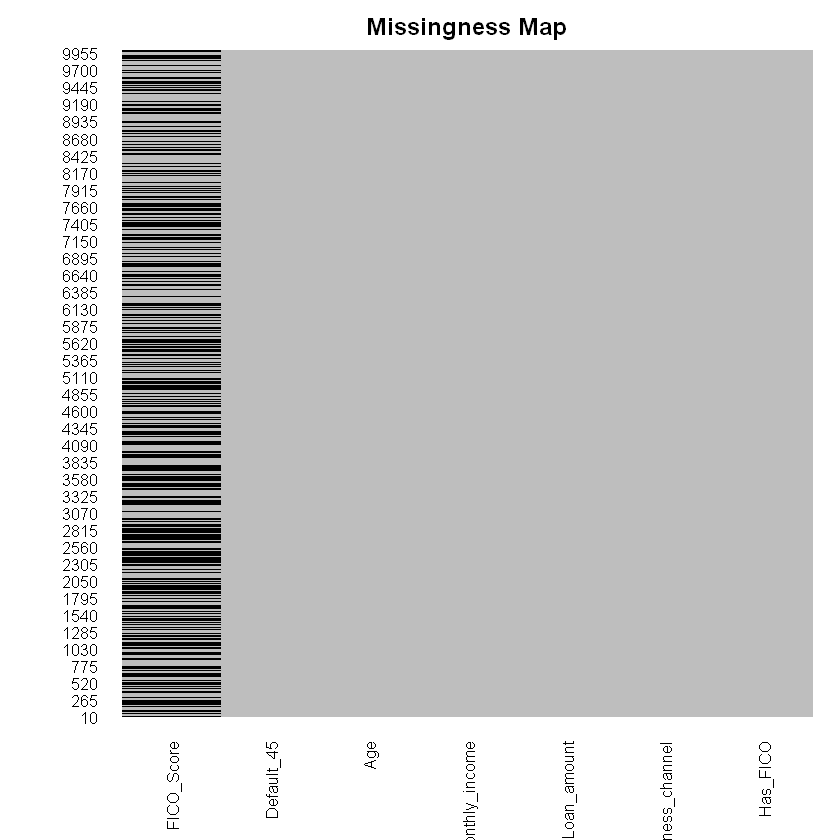

In [54]:
# Missing plot to represent missing values in a visualized form for selected variables
missmap(sele_var , col=c("black", "grey"), legend=FALSE)


Warning message:
"Unknown or uninitialised column: 'arguments'."Warning message:
"Unknown or uninitialised column: 'arguments'."Warning message:
"Unknown or uninitialised column: 'imputations'."

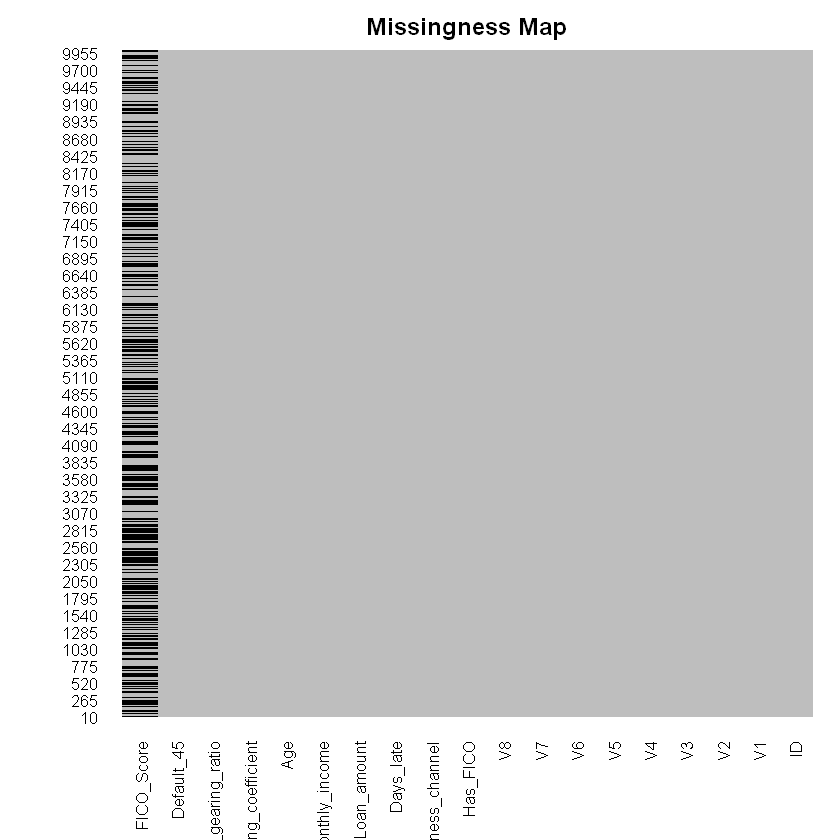

In [55]:
# Missing plot to represent missing values in a visualized form for the whole accepts dataset
missmap(Accepts , col=c("black", "grey"), legend=FALSE)


Data sampling
Reject Inference problem
chosen method - First analyze the accepts data with models 
create a scorecard on the rejects dataset
combine both reject and accept data 
then test it with the model

DATA PREPROCESSING
IT IS AN IMPORTANT ASPECT IN ORDER TO MAKE THE DATA FIT FOR PREDICTIONS OF CREDIT SCORE
FOLLOWING ASPECTS WILL BE COVERED IN THIS PROCESS:
1.Treatment of Missing Values
2.Treatment of outlier values

In [85]:
#Check the count of NA values in the dataframe
sum(is.na(Accepts$FICO_Score))

[1] 4472

In [92]:
#Replaced all NA values with 0
Accepts$FICO_Score <- na.replace(Accepts$FICO_Score, 0)

Installing package into 'C:/Users/kgupta/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'imputeTS' is in use and will not be installed"Warning message:
"na.replace will replaced by na_replace.
    Functionality stays the same.
    The new function name better fits modern R code style guidelines.
    Please adjust your code accordingly."

In [89]:
#outlier detection in the dataset
b1 <- boxplot(Accepts$Max_gearing_ratio)
b2 <- boxplot(Accepts$Age)
b3 <- boxplot(Accepts$Monthly_income)  # with outlier
b4 <- boxplot(Accepts$Loan_amount)  # with otulier
b5 <- boxplot(Accepts$FICO_Score) # with outlier
b6 <- boxplot(Accepts$Days_late) #with outlier
b7 <- boxplot(Accepts$Business_channel)
b8 <- boxplot(Accepts$Has_FICO)

ERROR: Error in Accepts$Max_gearing_ratio: $ operator is invalid for atomic vectors


In [83]:
#Removing outliers
Accepts[-which(Accepts$Monthly_income %in% b3),]
Accepts[-which(Accepts$Loan_amount %in% b4),]
Accepts[-which(Accepts$FICO_Score %in% b5),]
Accepts[-which(Accepts$Days_late %in% b6),]

ID,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,Days_late,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio,Default_45


ID,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,Days_late,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio,Default_45


ID,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,Days_late,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio,Default_45


ID,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,Days_late,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio,Default_45


In [93]:
Accepts

ID,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,Days_late,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio,Default_45
250263,1,1,11,5,6,7,1,2,0,1,0,0.0000000,1.43851768,-0.25908469,1.78103991,0.86026906,0.5139798,0
250290,1,2,6,4,5,1,1,2,1,1,0,1.4981826,0.20481141,0.38331185,1.10716265,-0.71824919,1.7965902,0
250249,2,3,11,5,7,7,1,2,1,1,0,-0.2417306,-0.85265110,-0.73242952,1.40666366,1.12292973,-0.7686307,0
249516,3,3,10,4,2,4,1,2,0,1,168,0.0000000,-0.67640735,-0.05734964,0.95741215,-1.70248171,0.5139798,1
249827,1,3,5,2,4,4,1,3,0,1,0,0.0000000,-0.41204172,-0.57464791,-0.39034236,0.91007667,-0.7686307,0
250329,1,3,11,2,5,4,3,4,0,2,0,0.0000000,0.55729892,-0.21062320,-0.39034236,-0.38449560,0.5139798,0
250196,2,4,11,5,7,7,3,1,1,1,0,0.5909421,-0.85265110,-0.67495193,1.25691315,-0.78955496,-0.7686307,0
250358,1,3,12,3,3,5,1,3,0,2,0,0.0000000,-0.46491485,-0.58028297,-0.46521761,0.50352734,-0.7686307,0
250375,2,5,11,5,1,7,1,1,0,1,336,0.0000000,0.02856766,-0.70988929,1.40666366,1.06226661,-0.7686307,1
250415,3,3,14,1,4,4,3,1,0,1,0,0.0000000,-0.23579797,-0.76623986,-0.31546711,1.02395306,-0.7686307,0


WOE AND IV

In [103]:
library(devtools)
install.packages("woe")
library(woe)

Installing package into 'C:/Users/kgupta/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'woe' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kgupta\AppData\Local\Temp\RtmpkrSyed\downloaded_packages


In [114]:
#IV BASED ON 5 BINS
IV <- create_infotables(data=Accepts, y="Default_45", bins=5, parallel=TRUE)


In [116]:
#IV BASED ON 10 BINS
IV1 <- create_infotables(data=Accepts, y="Default_45", bins=10, parallel=TRUE)

In [117]:
#IV BASED ON 15 BINS
IV2 <- create_infotables(data=Accepts, y="Default_45", bins=15, parallel=TRUE)

In [118]:
# SEE THE BEST VARIABLES FOR PREDICTION BASED ON DIFFERENT NUMBER OF BINS
data.frame(IV$Summary)
data.frame(IV1$Summary)
data.frame(IV2$Summary)

,Variable,IV
12,Days_late,2.306707189
13,FICO_Score,0.596513803
6,V5,0.316391457
16,Age,0.284950814
7,V6,0.226941193
2,V1,0.150964861
5,V4,0.145932144
9,V8,0.086648922
8,V7,0.085121684
3,V2,0.076749106


,Variable,IV
13,FICO_Score,0.648385807
6,V5,0.321492504
16,Age,0.297262730
7,V6,0.226941193
2,V1,0.150964861
5,V4,0.145932144
4,V3,0.094296988
9,V8,0.086648922
8,V7,0.085121684
3,V2,0.076749106


,Variable,IV
13,FICO_Score,0.648752155
6,V5,0.327035775
16,Age,0.298202616
11,Business_channel,0.259697833
7,V6,0.228355981
2,V1,0.168001503
5,V4,0.145932144
4,V3,0.115569719
9,V8,0.086648922
8,V7,0.085121684


After the process of Weight of Evidence important variables were discovered which can be used to predict the target variable and prepare the scorecard.

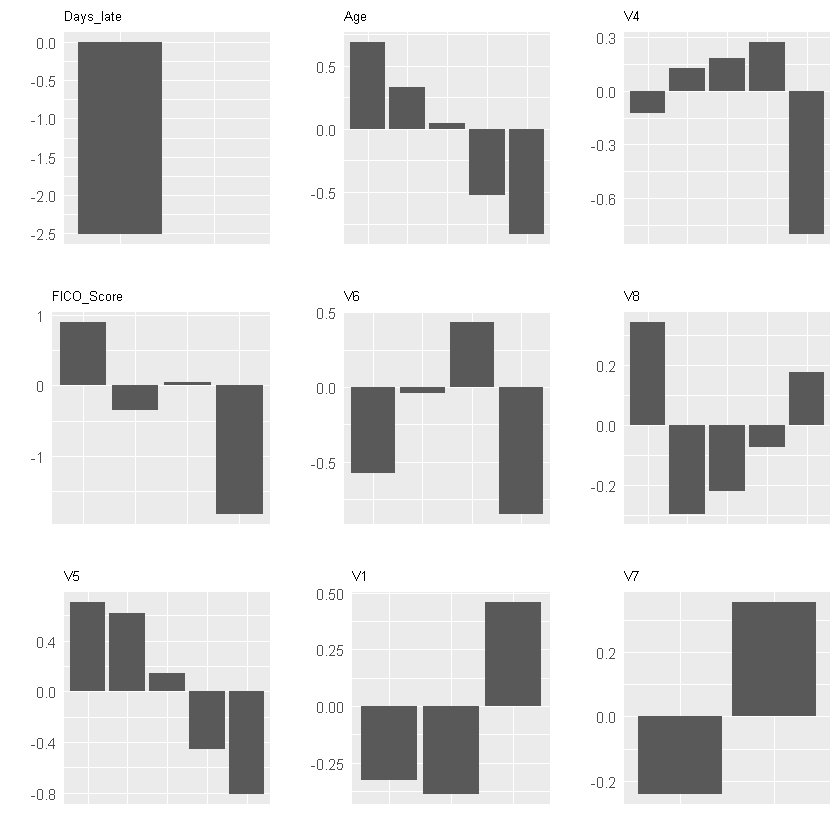

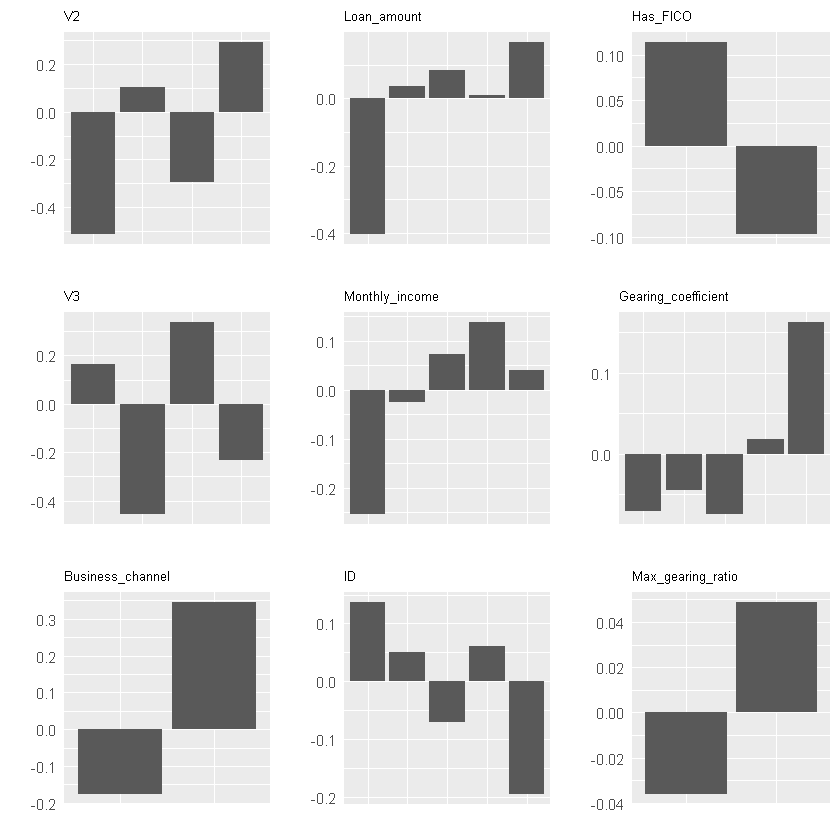

In [121]:
plot_infotables(IV, IV$Summary$Variable, same_scale=FALSE)


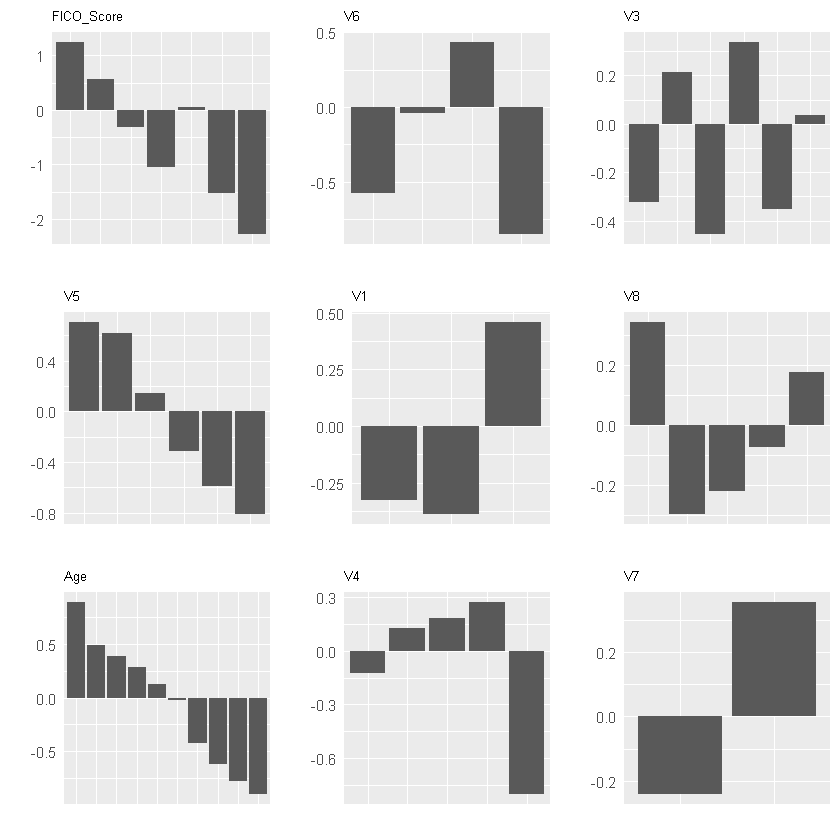

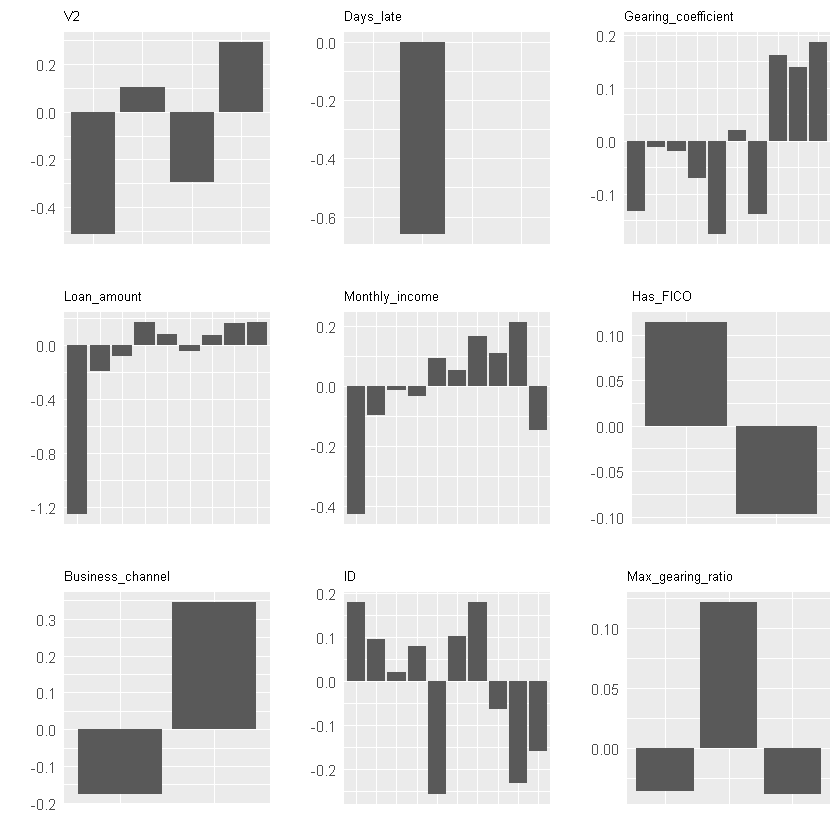

In [122]:
plot_infotables(IV1, IV1$Summary$Variable, same_scale=FALSE)

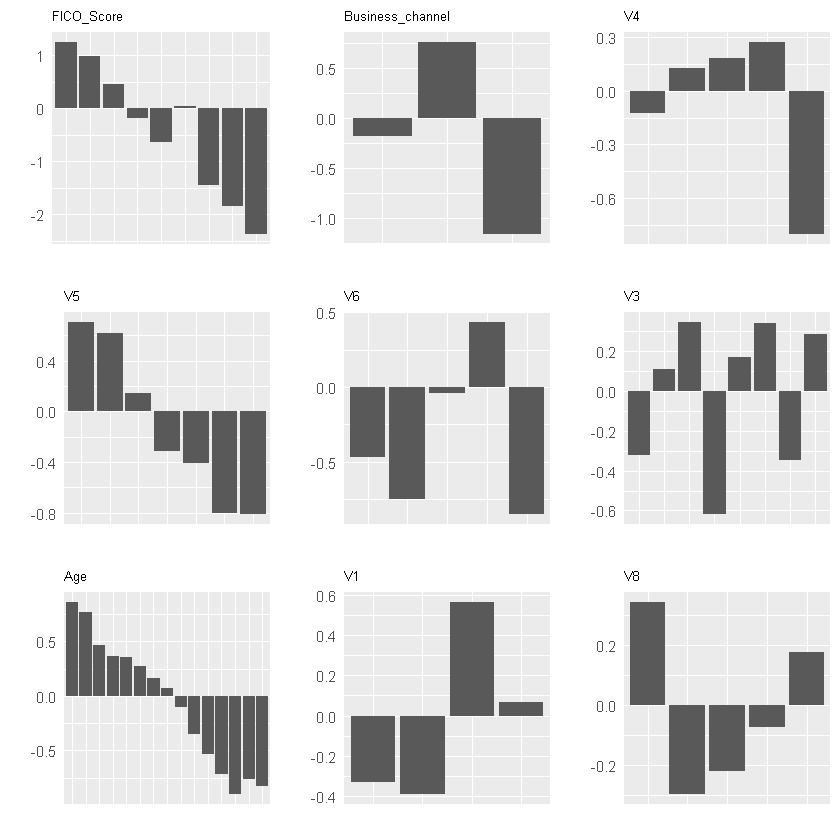

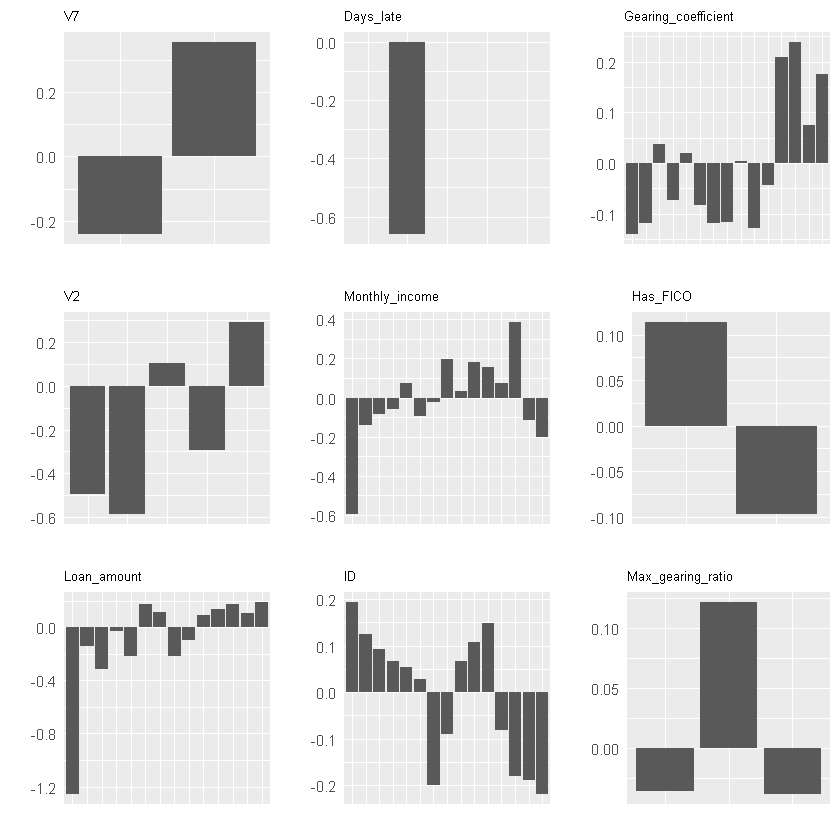

In [123]:
plot_infotables(IV2, IV2$Summary$Variable, same_scale=FALSE)

BASED ON THE TOP FEATURES GATHERED ABOVE A NEW DATAFRAME OUT OF ACCEPTS WILL BE CREATED ON WHICH TESTING WILL BE DONE
All these features were Days_late, FICO_Score, Age, V6, V5, Business_channel, Default_45 and ID

In [202]:
Accepts_final <- Accepts[,c("Days_late", "FICO_Score","Age","V6","V5","Business_channel","Default_45","ID")]
Accepts_final
nrow(Accepts_final)

Days_late,FICO_Score,Age,V6,V5,Business_channel,Default_45,ID
0,0.0000000,1.78103991,7,6,1,0,250263
0,1.4981826,1.10716265,1,5,1,0,250290
0,-0.2417306,1.40666366,7,7,1,0,250249
168,0.0000000,0.95741215,4,2,1,1,249516
0,0.0000000,-0.39034236,4,4,1,0,249827
0,0.0000000,-0.39034236,4,5,2,0,250329
0,0.5909421,1.25691315,7,7,1,0,250196
0,0.0000000,-0.46521761,5,3,2,0,250358
336,0.0000000,1.40666366,7,1,1,1,250375
0,0.0000000,-0.31546711,4,4,1,0,250415


[1] 10000

Modelling part
Since it is a classification problem , we will model it thorugh Linear, Logistic and decision tree

In [142]:
#Splitting the data into train, validation and test set
f_Training   <- 0.60
f_Validation <- 0.30
f_Test       <- 0.10

# Compute sample sizes.
sa_Training   <- floor(f_Training   * nrow(Accepts_final))
sa_Validation <- floor(f_Validation * nrow(Accepts_final))
sa_Test       <- floor(f_Test       * nrow(Accepts_final))

# Create the randomly-sampled indices for the dataframe. Use setdiff() to
# avoid overlapping subsets of indices.
i_Training    <- sort(sample(seq_len(nrow(Accepts_final)), size=sa_Training))
in_Training <- setdiff(seq_len(nrow(Accepts_final)), i_Training)
i_Validation  <- sort(sample(in_Training, size=sa_Validation))
i_Test        <- setdiff(in_Training, i_Validation)

# Finally, output the three dataframes for training, validation and test.
Training   <- Accepts_final[i_Training, ]
Validation <- Accepts_final[i_Validation, ]
Test       <- Accepts_final[i_Test, ]

Linear Regression

In [137]:
library(pROC)
library(ROCR)


Warning message:
"package 'ROCR' was built under R version 3.6.2"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.6.2"Registered S3 method overwritten by 'gdata':
  method         from     
  reorder.factor DescTools

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [143]:
model <- lm(Default_45 ~ ., data=Training)
summary(model)


Call:
lm(formula = Default_45 ~ ., data = Training)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94237 -0.10012 -0.06430 -0.01784  0.87843 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.970e-02  1.565e-02   3.176 0.001503 ** 
Days_late         2.897e-03  2.783e-05 104.118  < 2e-16 ***
FICO_Score       -3.181e-02  4.493e-03  -7.081 1.60e-12 ***
Age              -1.667e-02  4.395e-03  -3.793 0.000150 ***
V6                1.198e-02  2.737e-03   4.377 1.22e-05 ***
V5               -6.888e-03  2.090e-03  -3.296 0.000985 ***
Business_channel -5.465e-03  4.764e-03  -1.147 0.251334    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2387 on 5993 degrees of freedom
Multiple R-squared:  0.6855,	Adjusted R-squared:  0.6852 
F-statistic:  2177 on 6 and 5993 DF,  p-value: < 2.2e-16


As per the linear regression analysis, Days_late and V6 were the most important features.

[1] 0.9995719

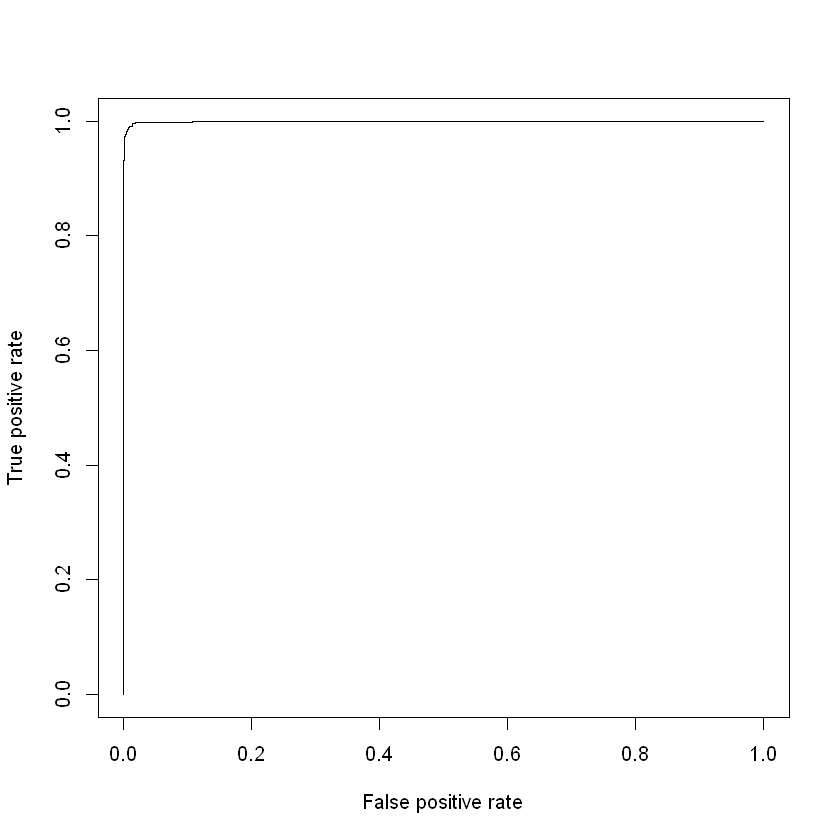

In [144]:
p <- predict(model, newdata= Validation, type="response")
pr <- prediction(p, Validation$Default_45)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

Logistic Regression

In [145]:
model1 <- glm(Default_45 ~.,family=binomial(link='logit'),data=Training)
summary(model1)

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = Default_45 ~ ., family = binomial(link = "logit"), 
    data = Training)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-1.241e-03  -2.000e-08  -2.000e-08  -2.000e-08   3.287e-04  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)      -104.6782  5896.3036  -0.018    0.986
Days_late           2.4883    78.9962   0.031    0.975
FICO_Score         -0.5395  1527.1326   0.000    1.000
Age                -0.4171  1063.3172   0.000    1.000
V6                  0.7643   764.0868   0.001    0.999
V5                  0.1327   514.8653   0.000    1.000
Business_channel    7.3259  4626.2213   0.002    0.999

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6.5735e+03  on 5999  degrees of freedom
Residual deviance: 2.9754e-06  on 5993  degrees of freedom
AIC: 14

Number of Fisher Scoring iterations: 25


In [146]:
anova(model1, test="Chisq")

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,5999,6.573503e+03,NA
Days_late,1,6.573503e+03,5998,3.132550e-06,0.0000000
FICO_Score,1,0.000000e+00,5997,3.136639e-06,1.0000000
Age,1,1.841840e-08,5996,3.118220e-06,0.9998917
V6,1,0.000000e+00,5995,3.143260e-06,1.0000000
V5,1,9.842771e-09,5994,3.133417e-06,0.9999208
Business_channel,1,1.580447e-07,5993,2.975372e-06,0.9996828


[1] 1

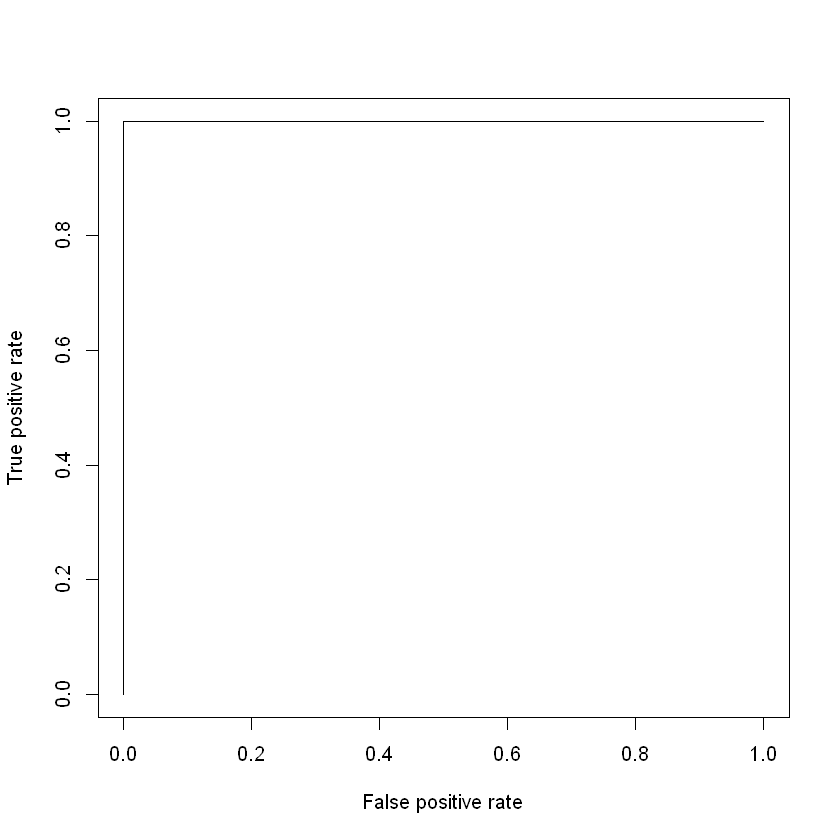

In [147]:
p <- predict(model1, newdata= Validation, type="response")
pr <- prediction(p, Validation$Default_45)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

DECISION TREE

In [157]:
install.packages("partykit")
library(partykit)
library(caret)

Installing package into 'C:/Users/kgupta/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependency 'inum'



package 'inum' successfully unpacked and MD5 sums checked
package 'partykit' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kgupta\AppData\Local\Temp\RtmpkrSyed\downloaded_packages


Warning message:
"package 'partykit' was built under R version 3.6.3"Loading required package: grid
Loading required package: libcoin
Warning message:
"package 'libcoin' was built under R version 3.6.3"Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.6.2"

In [163]:
install.packages("rpart.plot")
library(rpart.plot)

Installing package into 'C:/Users/kgupta/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kgupta\AppData\Local\Temp\RtmpkrSyed\downloaded_packages


Warning message:
"package 'rpart.plot' was built under R version 3.6.3"Loading required package: rpart


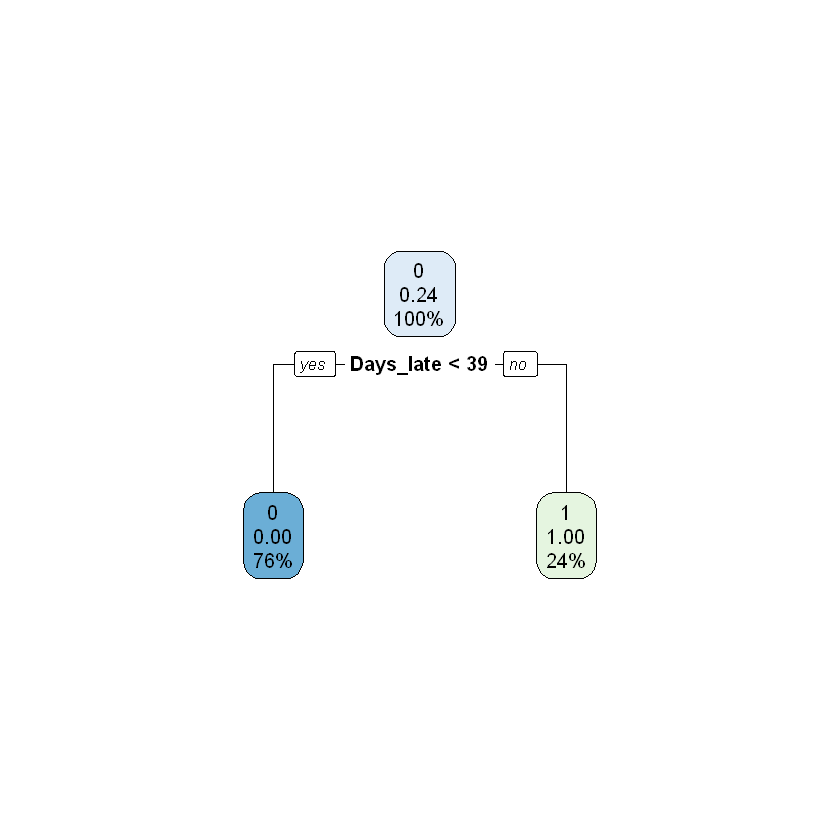

In [165]:
library(rpart)
fit <- rpart( ~., data = Training, method = 'class')
rpart.plotDefault_45(fit)

In [172]:
predict_unseen <-predict(fit, Validation, type = 'class')
accuracy_Validation <- sum(diag(table_mat)) / sum(table_mat)
print(paste('Accuracy for Validation', accuracy_Validation))

[1] "Accuracy for Validation 1"


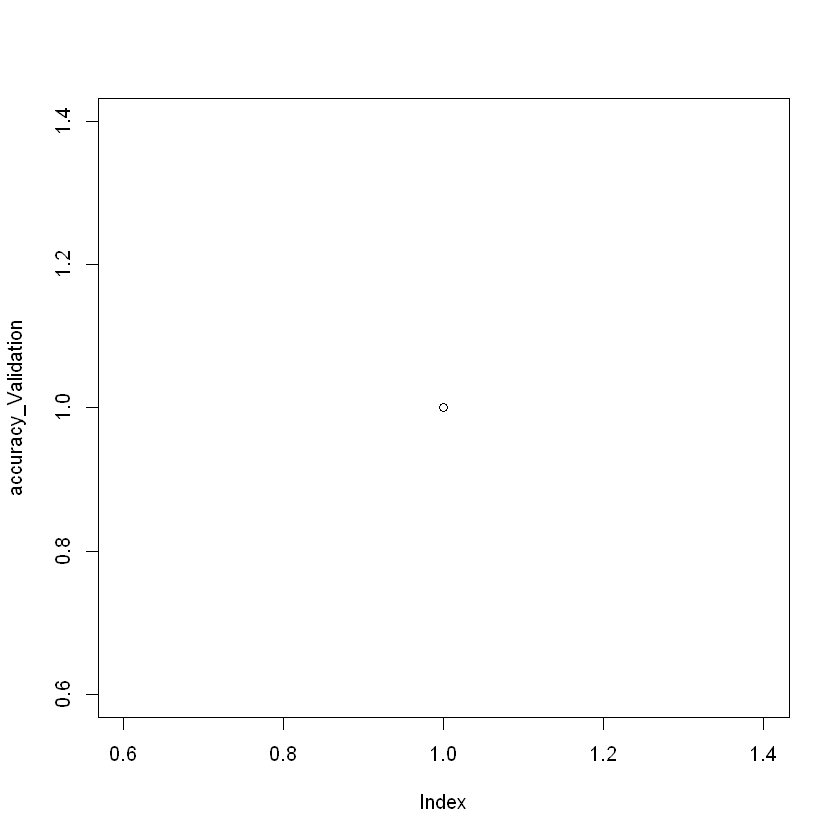

In [173]:
plot(accuracy_Validation)


REJECTS DATA (creating scorecard)

Visualizations

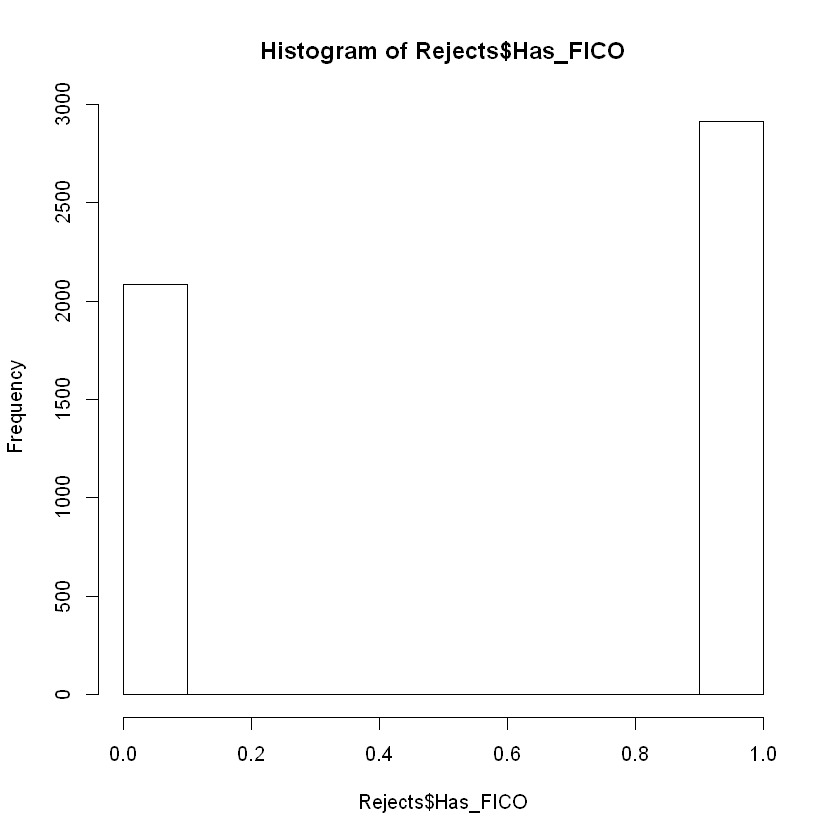

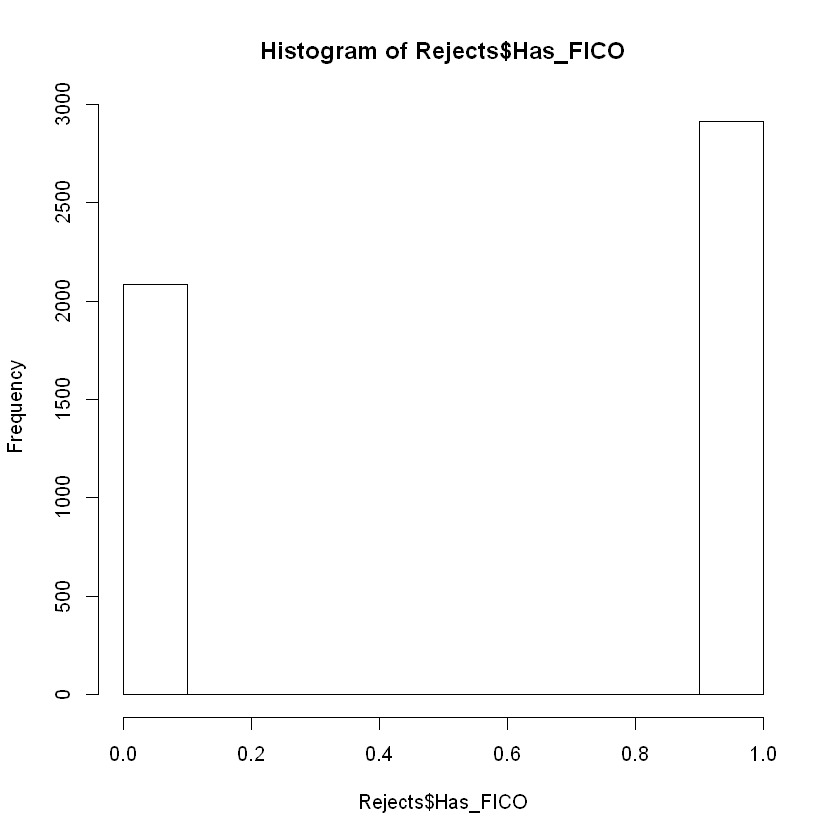

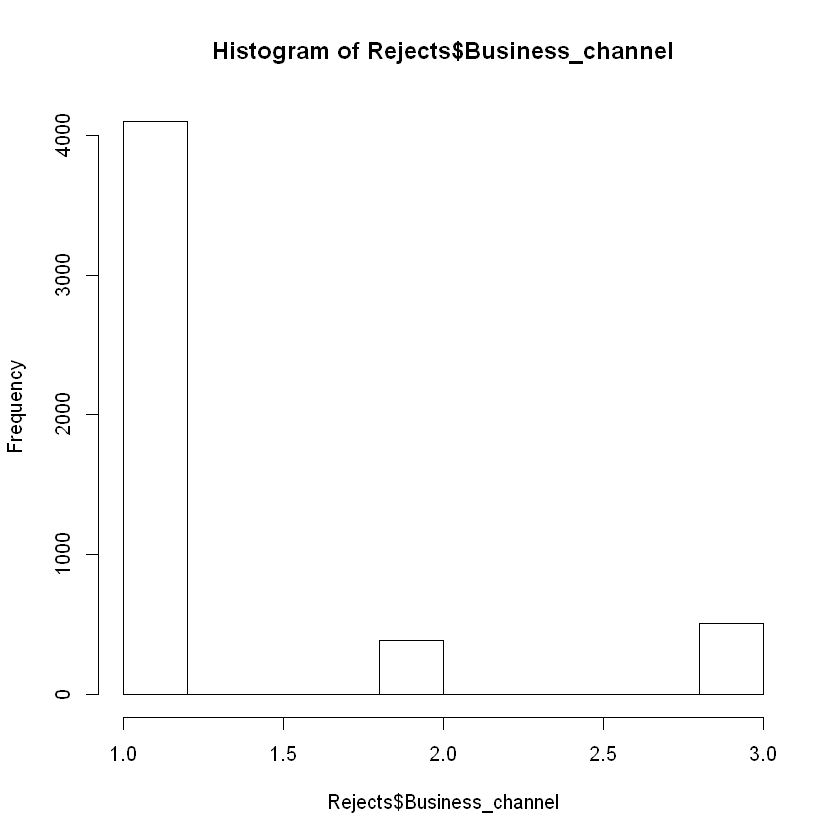

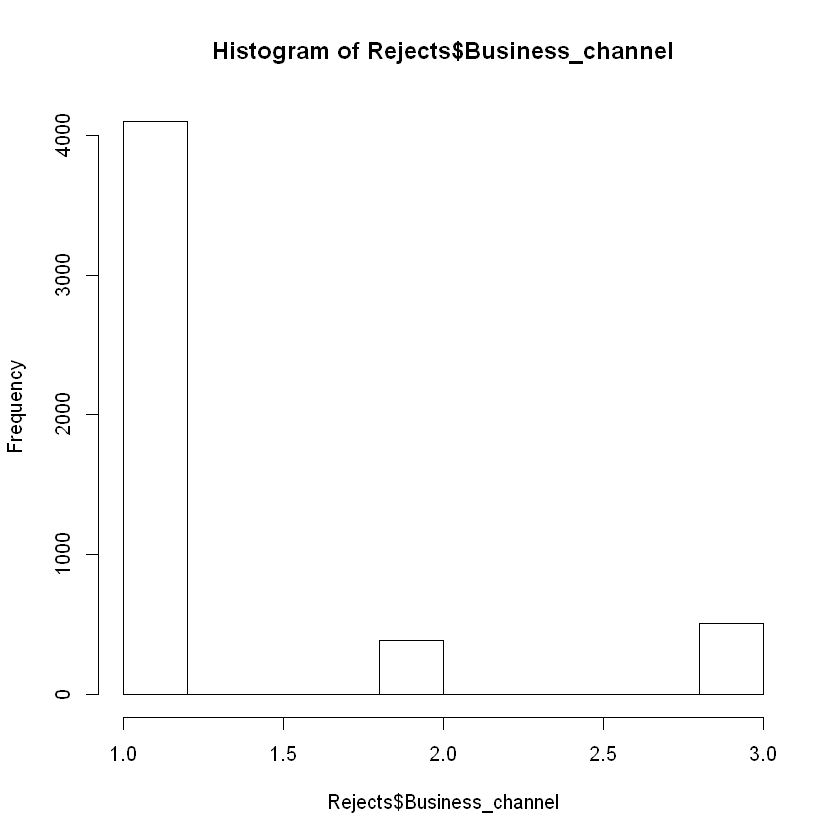

In [174]:
# Histogram for selected variables from the accepts dataset
Rh1 <- hist(Rejects$Has_FICO)
plot(Rh1)
Rh2 <- hist(Rejects$Business_channel)
plot(Rh2)


In [175]:
#CALCULATE STATISTICS FOR AGE, LOAN AMOUNT AND MONTHLY INCOME
describe(Rejects$Age)
describe(Rejects$Loan_amount)
describe(Rejects$Monthly_income)

Rejects$Age 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    5000        0       50    0.999 -0.05859    1.116  -1.4386  -1.2888 
     .25      .50      .75      .90      .95 
 -0.9145  -0.1657   0.5830   1.4815   1.7062 

lowest : -1.588346 -1.513471 -1.438596 -1.363721 -1.288845
highest:  1.781040  1.855915  1.930790  2.005666  2.080541

Rejects$Loan_amount 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    5000        0      460    0.991 -0.04345   0.8812  -0.9057  -0.8527 
     .25      .50      .75      .90      .95 
 -0.6764  -0.3239   0.2929   0.7335   1.6148 

lowest : -1.117017 -1.108381 -1.106971 -1.099569 -1.095867
highest:  5.139636  5.315880  5.492124  5.668368  5.844611

Rejects$Monthly_income 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    5000        0     1803        1  0.09731   0.7468  -0.5510  -0.5059 
     .25      .50      .75      .90      .95 
 -0.4022  -0.1610   0.2909   0.9312   1.6072 

lowest : -0.7031272 -0.7008732 -0.6986192 -0.6974922 -0.6963651
highest: 10.8476135 12.2518698 13.0080945 14.4946227 29.3182047

Warning message:
"Unknown or uninitialised column: 'arguments'."Warning message:
"Unknown or uninitialised column: 'arguments'."Warning message:
"Unknown or uninitialised column: 'imputations'."

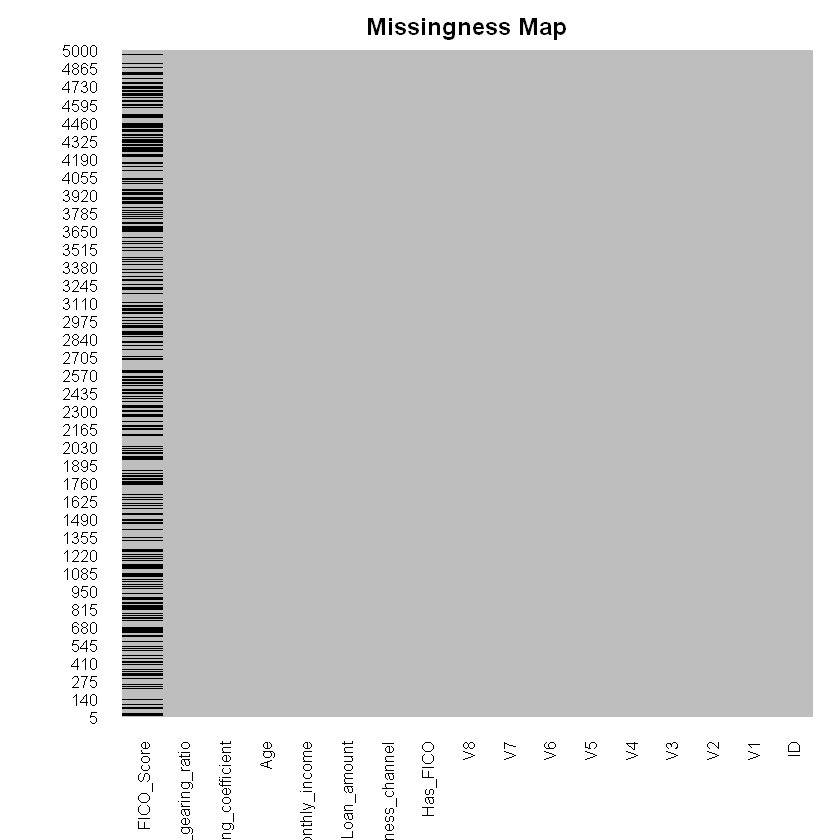

In [176]:
# Missing plot to represent missing values in a visualized form for selected variables
missmap(Rejects , col=c("black", "grey"), legend=FALSE)


Data preprocessing

In [178]:
#Check the count of NA values in the dataframe
sum(is.na(Rejects$FICO_Score))

[1] 0

In [179]:
#Replaced all NA values with 0
Rejects$FICO_Score <- na.replace(Rejects$FICO_Score, 0)

Warning message:
"na.replace will replaced by na_replace.
    Functionality stays the same.
    The new function name better fits modern R code style guidelines.
    Please adjust your code accordingly."

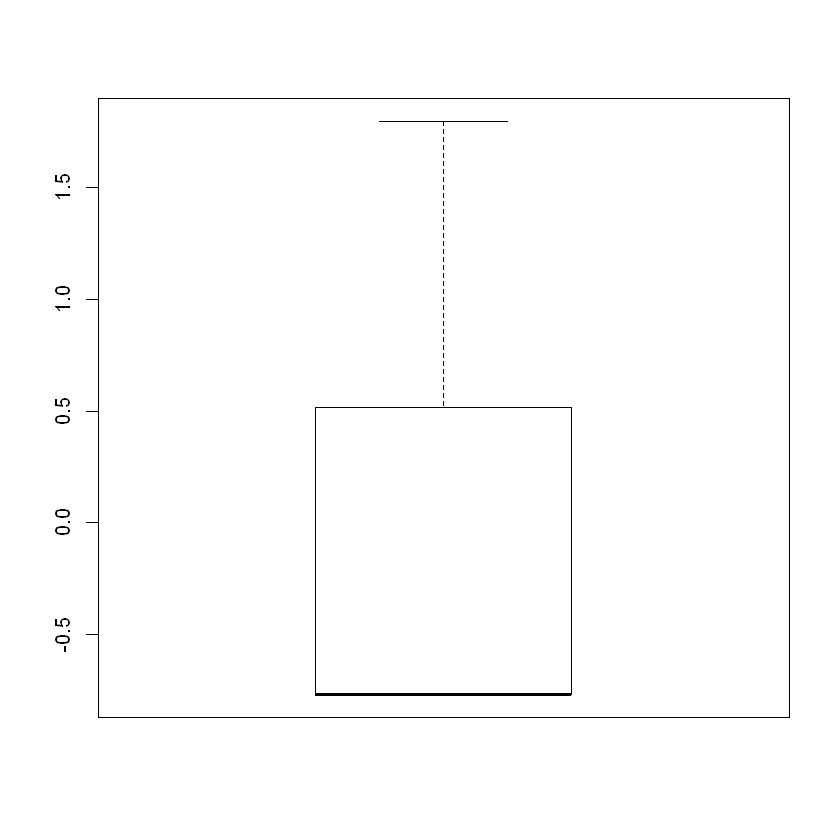

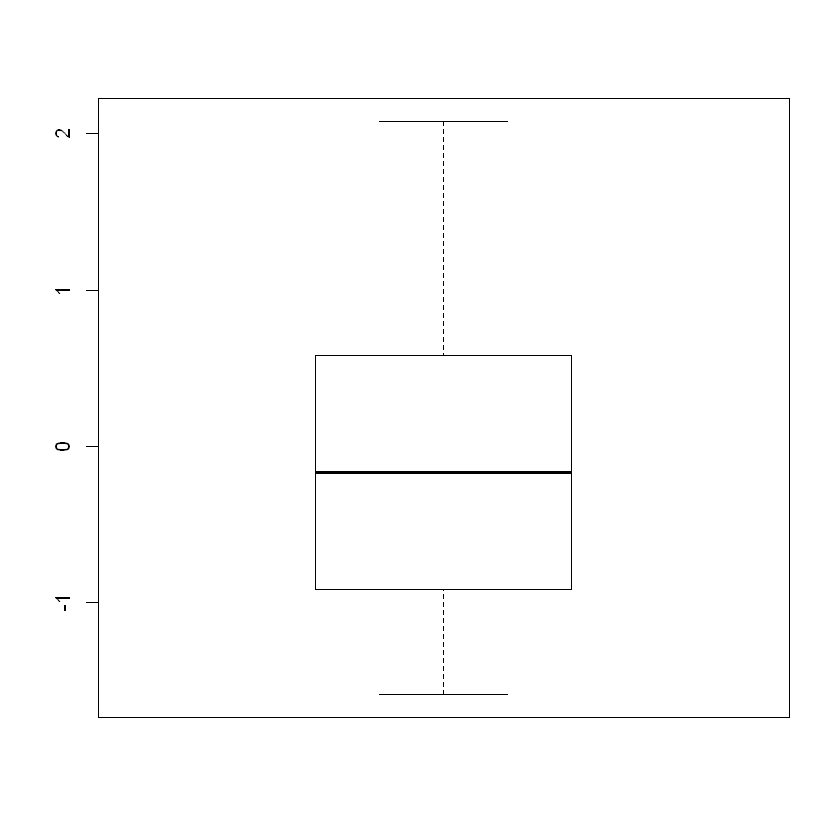

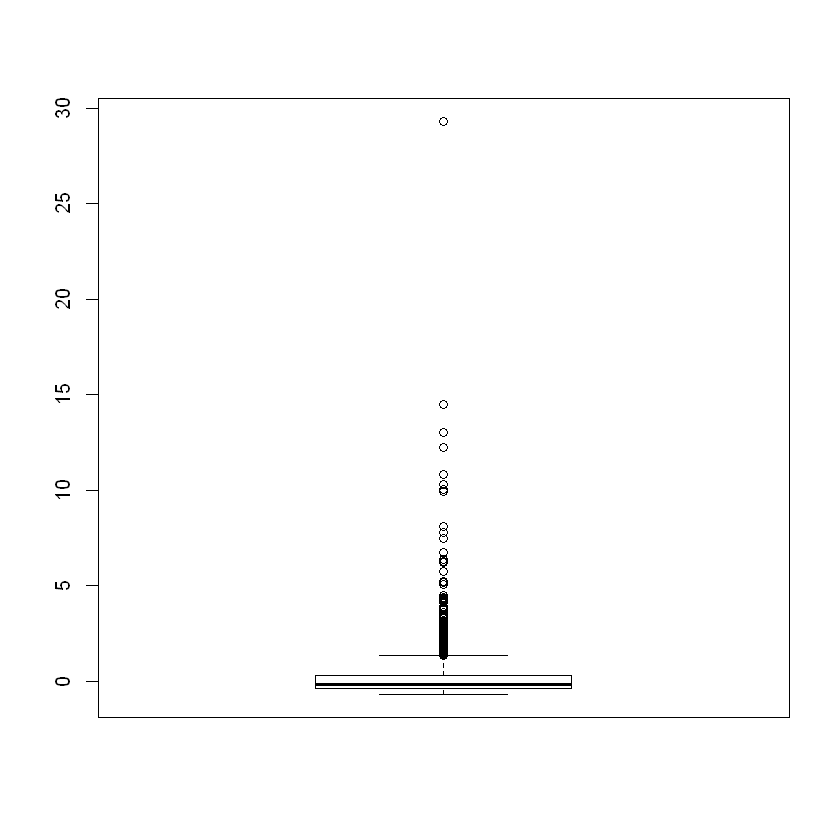

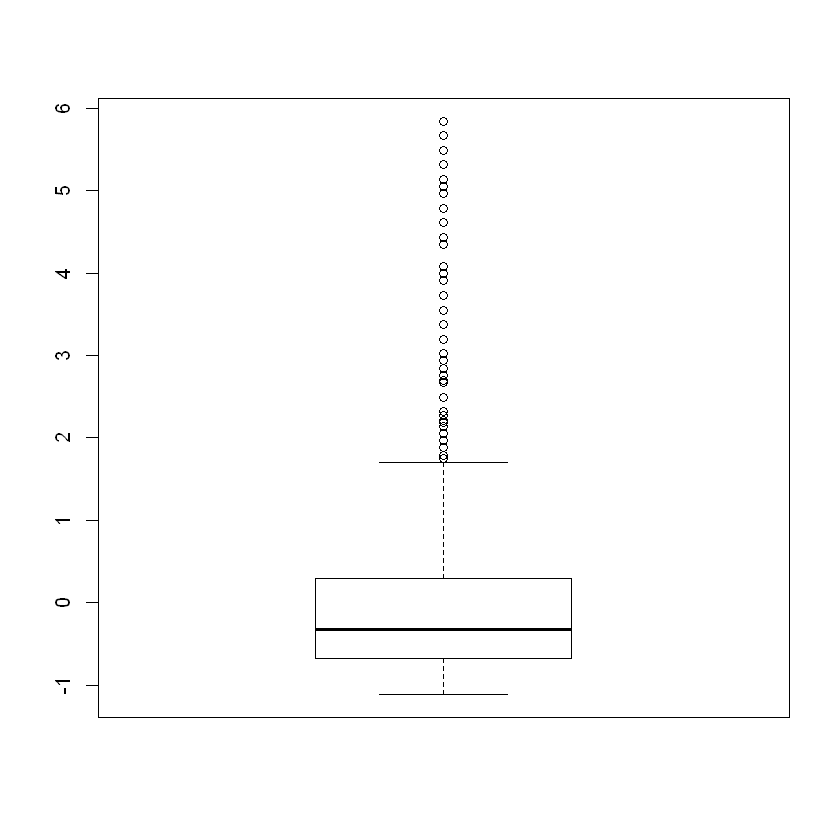

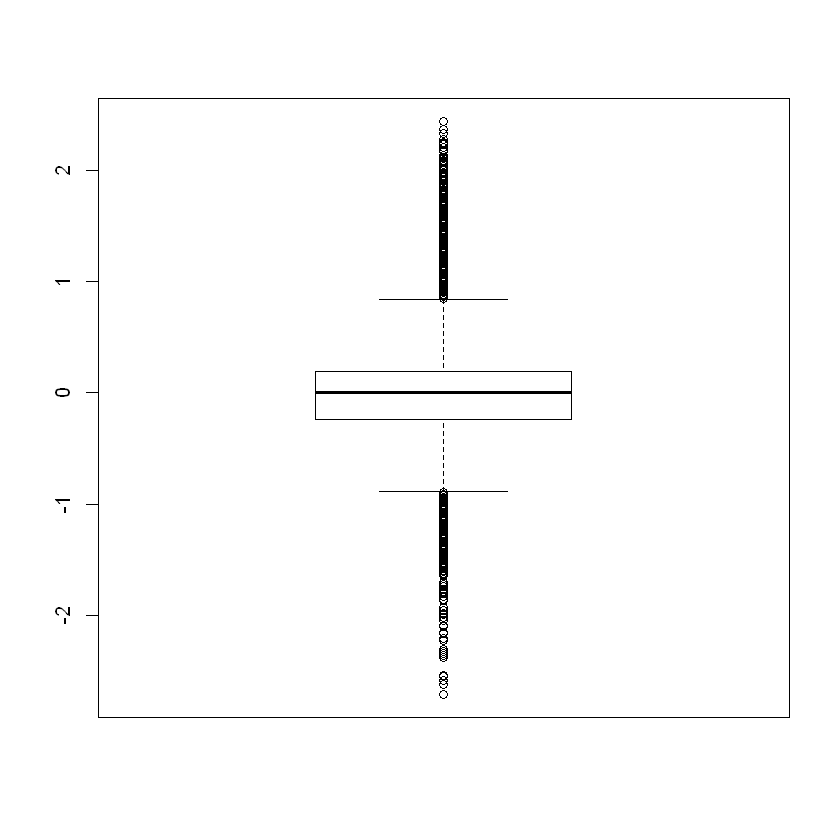

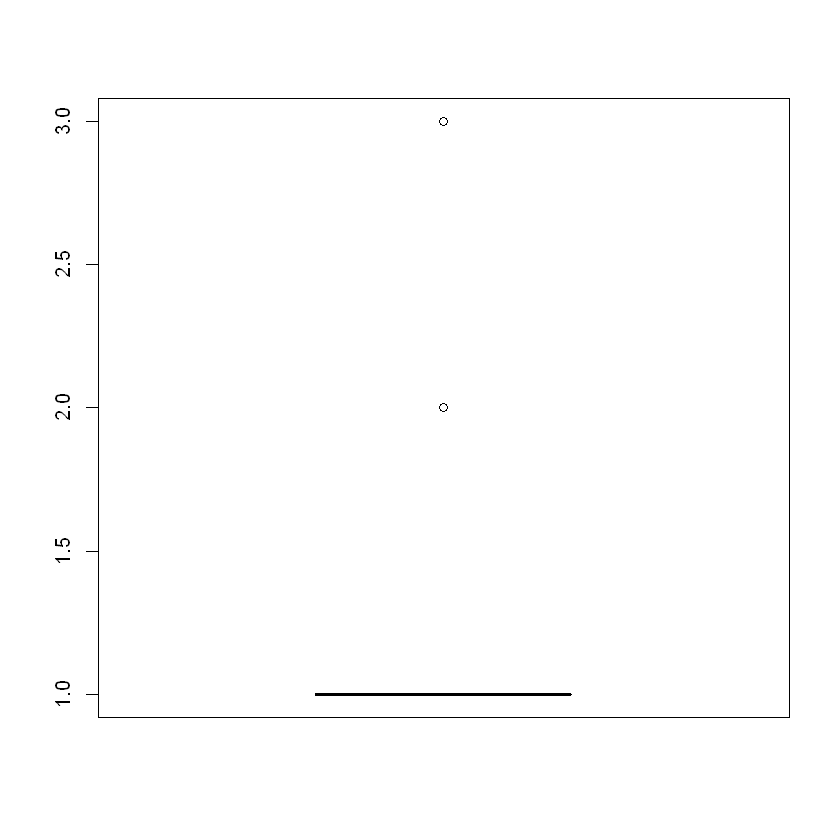

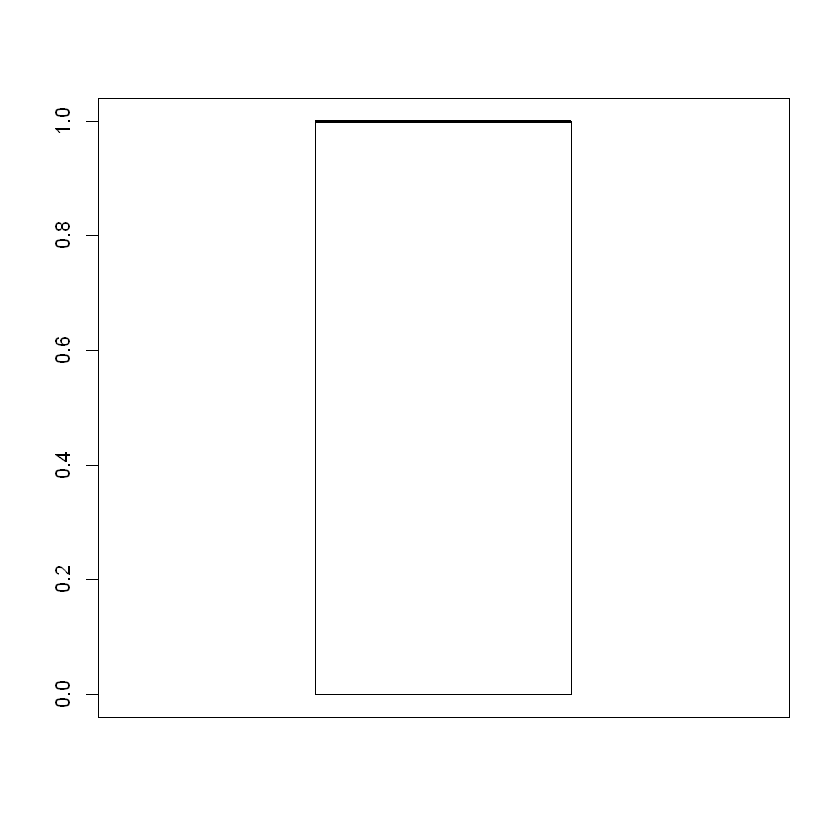

In [180]:
#outlier detection in the dataset
rb1 <- boxplot(Rejects$Max_gearing_ratio)
rb2 <- boxplot(Rejects$Age)
rb3 <- boxplot(Rejects$Monthly_income)  # with outlier
rb4 <- boxplot(Rejects$Loan_amount)  # with otulier
rb5 <- boxplot(Rejects$FICO_Score) # with outlier
rb6 <- boxplot(Rejects$Business_channel) # With outlier
rb7 <- boxplot(Rejects$Has_FICO)

In [181]:
#Removing outliers
Accepts[-which(Rejects$Monthly_income %in% rb3),]
Accepts[-which(Rejects$Loan_amount %in% rb4),]
Accepts[-which(Rejects$FICO_Score %in% rb5),]
Accepts[-which(Rejects$Business_channel %in% rb6),]

ID,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,Days_late,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio,Default_45


ID,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,Days_late,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio,Default_45


ID,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,Days_late,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio,Default_45


ID,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,Days_late,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio,Default_45
250249,2,3,11,5,7,7,1,2,1,1,0,-0.2417306,-0.85265110,-0.73242952,1.40666366,1.12292973,-0.7686307,0
249827,1,3,5,2,4,4,1,3,0,1,0,0.0000000,-0.41204172,-0.57464791,-0.39034236,0.91007667,-0.7686307,0
250415,3,3,14,1,4,4,3,1,0,1,0,0.0000000,-0.23579797,-0.76623986,-0.31546711,1.02395306,-0.7686307,0
250321,1,4,15,2,2,4,1,2,0,1,0,0.0000000,-0.05955422,-0.67269791,-0.01596610,0.89624122,-0.7686307,0
250523,2,4,11,5,7,7,1,1,0,1,0,0.0000000,0.02856766,-0.48899504,1.18203790,1.01437467,-0.7686307,0
250566,1,4,10,5,7,7,1,2,1,1,15,1.5230385,-0.14767609,-0.26021170,0.95741215,1.05949952,0.5139798,0
250559,1,3,2,1,4,5,1,2,0,1,0,0.0000000,-0.32391985,-0.67269791,0.50816065,0.02460797,-0.7686307,0
250578,4,3,13,1,3,5,3,1,1,1,0,-1.1116873,-0.14767609,-0.70087319,-1.13909486,0.80790721,-0.7686307,0
250520,1,3,11,5,7,7,1,2,0,1,0,0.0000000,-0.23579797,-0.78201802,1.78103991,0.95903287,-0.7686307,0
250713,1,4,3,4,3,4,1,2,1,1,0,0.6530819,-0.58828547,-0.12609734,0.65791115,-0.93280507,0.5139798,0


WOE AND IV

In [183]:
#IV BASED ON 5 BINS
rIV <- create_infotables(data=Rejects, y="Has_FICO", bins=5, parallel=TRUE)



In [184]:
#IV BASED ON 10 BINS
rIV1 <- create_infotables(data=Rejects, y="Has_FICO", bins=10, parallel=TRUE)

In [185]:
#IV BASED ON 15 BINS
rIV2 <- create_infotables(data=Rejects, y="Has_FICO", bins=15, parallel=TRUE)


In [187]:
# SEE THE BEST VARIABLES FOR PREDICTION BASED ON DIFFERENT NUMBER OF BINS
data.frame(rIV$Summary)
data.frame(rIV1$Summary)
data.frame(rIV2$Summary)

,Variable,IV
11,FICO_Score,1.65784009
13,Monthly_income,0.42544056
6,V5,0.40964445
16,Max_gearing_ratio,0.37412187
14,Age,0.17614566
15,Gearing_coefficient,0.15378962
7,V6,0.11412268
2,V1,0.11172885
8,V7,0.10831673
5,V4,0.10595295


,Variable,IV
11,FICO_Score,1.657840091
6,V5,0.478241246
13,Monthly_income,0.463121415
16,Max_gearing_ratio,0.374121868
14,Age,0.235883756
7,V6,0.210882134
15,Gearing_coefficient,0.189700480
12,Loan_amount,0.134180092
5,V4,0.117934759
2,V1,0.111728853


,Variable,IV
11,FICO_Score,3.382094670
13,Monthly_income,0.483343323
6,V5,0.478241246
16,Max_gearing_ratio,0.374121868
14,Age,0.253605275
7,V6,0.223135783
15,Gearing_coefficient,0.184352304
2,V1,0.139114097
12,Loan_amount,0.128811586
5,V4,0.117934759


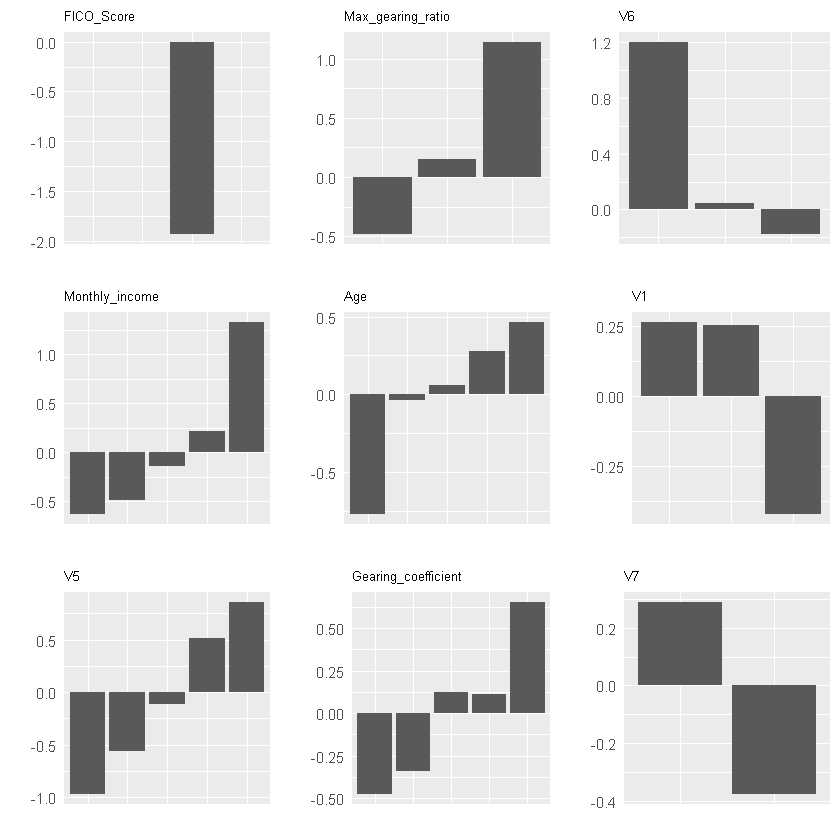

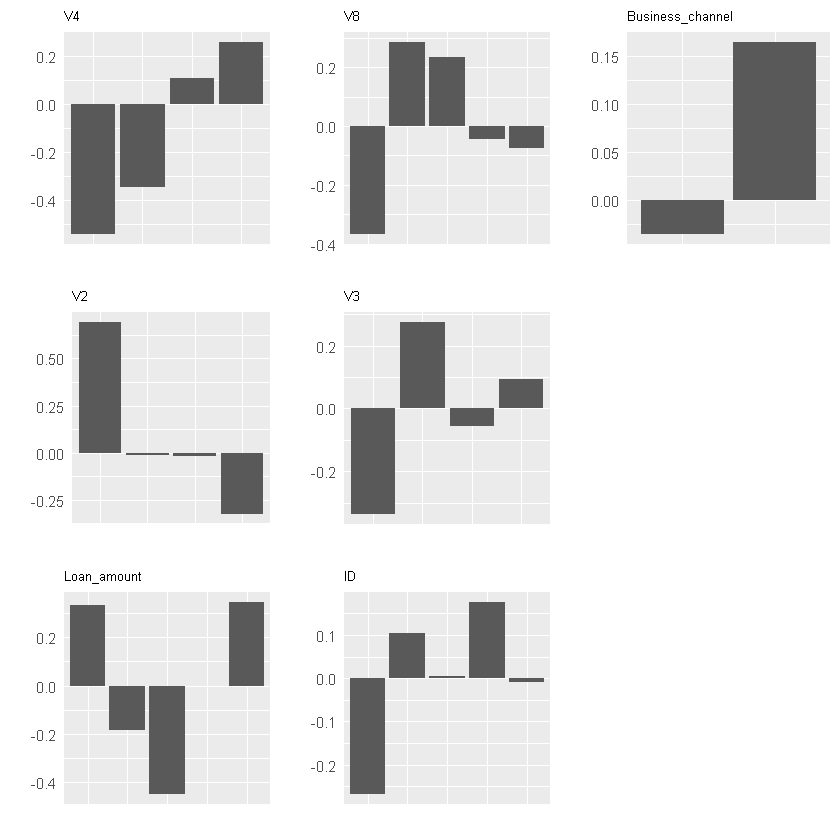

In [189]:
plot_infotables(rIV, rIV$Summary$Variable, same_scale=FALSE)


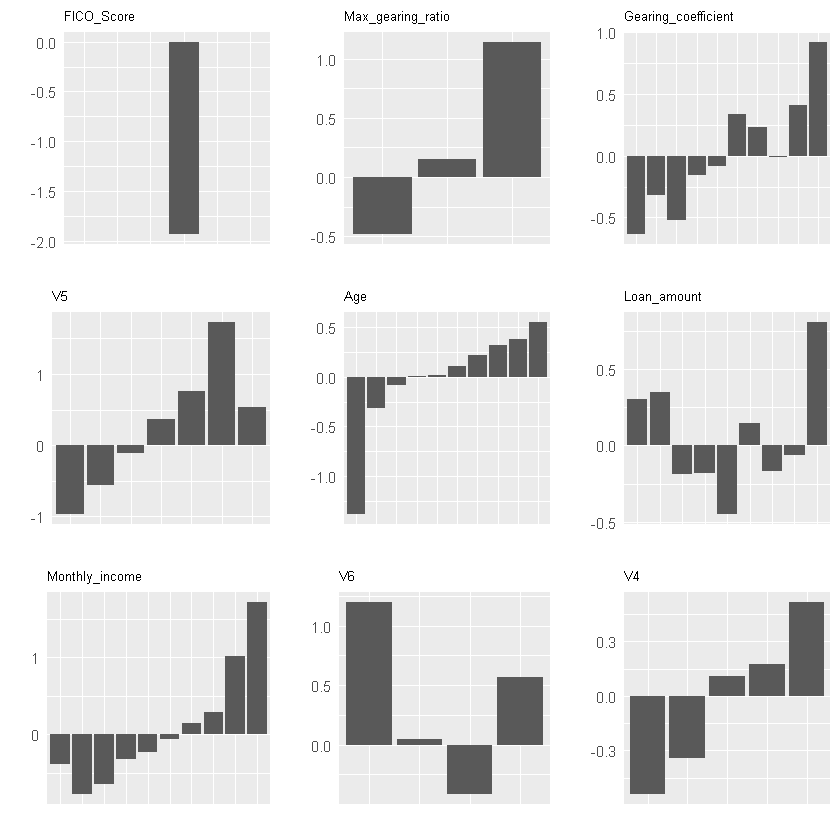

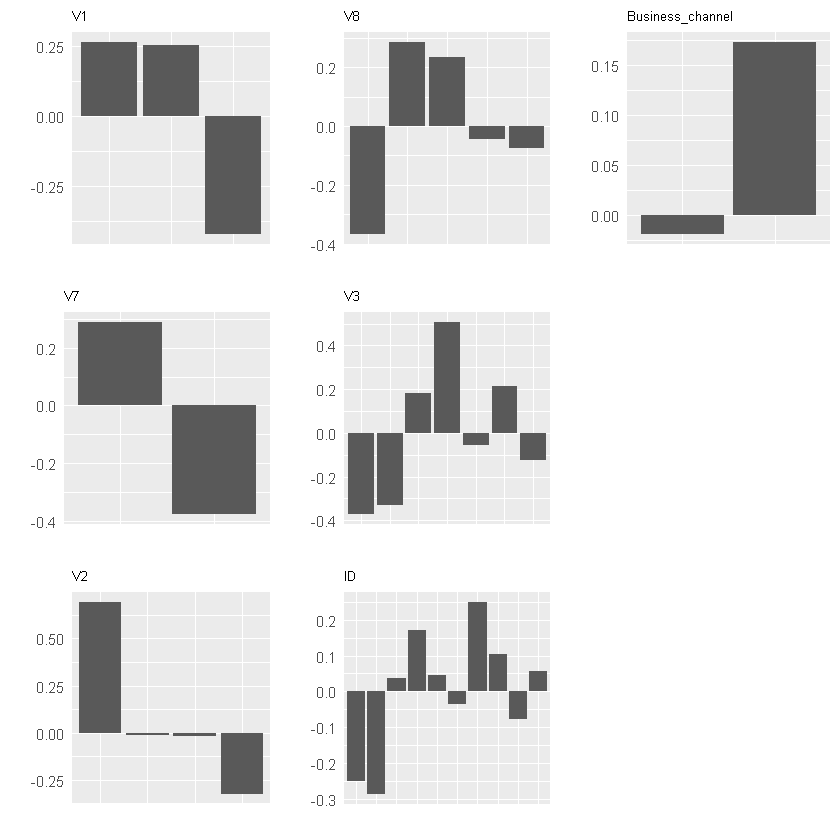

In [190]:
plot_infotables(rIV1, rIV1$Summary$Variable, same_scale=FALSE)


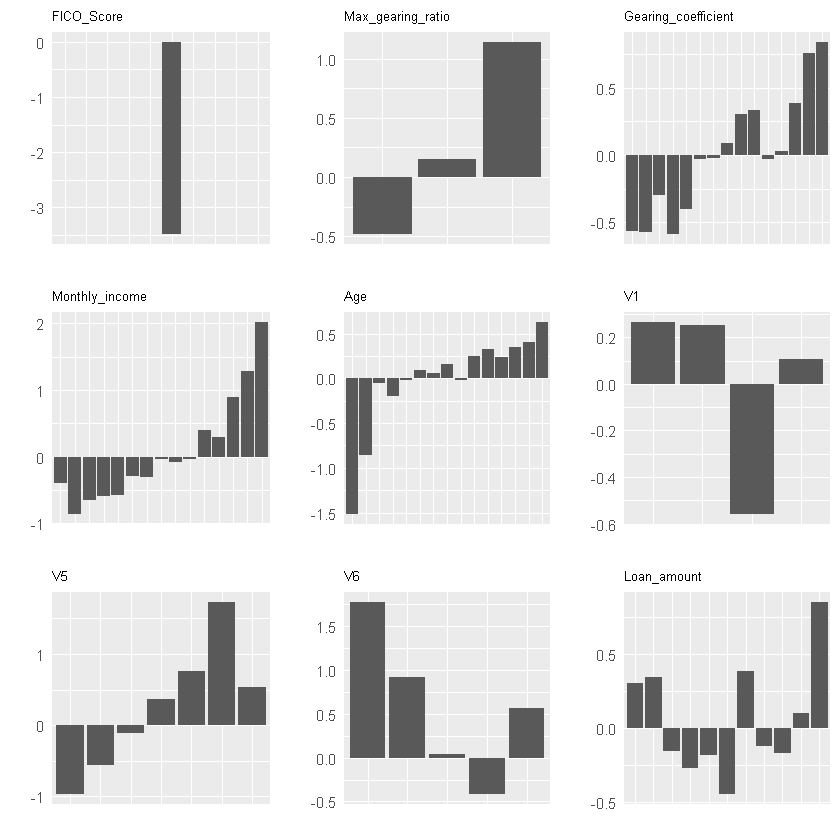

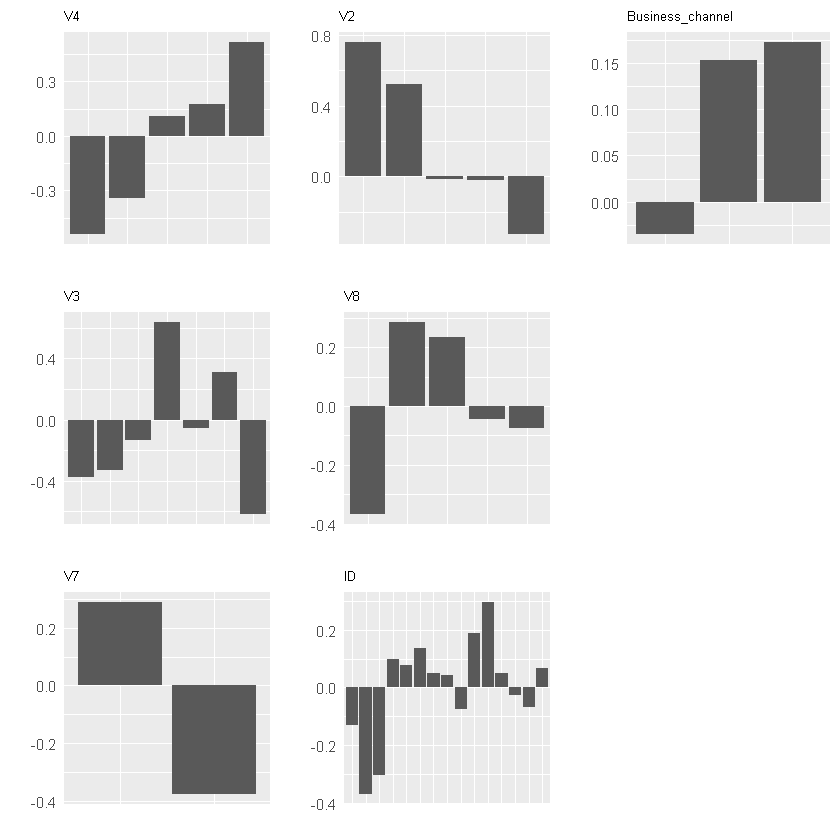

In [191]:
plot_infotables(rIV2, rIV2$Summary$Variable, same_scale=FALSE)


BASED ON THE TOP FEATURES GATHERED ABOVE A NEW DATAFRAME OUT OF ACCEPTS WILL BE CREATED ON WHICH TESTING WILL BE DONE

In [203]:
Rejects_final <- Rejects[,c("Monthly_income", "FICO_Score","Age","V6","V5","Max_gearing_ratio","Has_FICO","ID")]
Rejects_final

Monthly_income,FICO_Score,Age,V6,V5,Max_gearing_ratio,Has_FICO,ID
-0.60544913,-0.03045546,-1.06421961,5,1,-0.7686307,1,305932
1.29957219,0.71522164,0.80766165,4,6,1.7965902,1,305764
0.43402737,0.76493345,-0.39034236,4,5,1.7965902,1,305971
-0.49012205,-1.34781834,-0.98934436,5,2,-0.7686307,1,305664
0.56137967,1.63489006,0.58303590,4,5,1.7965902,1,305639
-0.50590021,0.97620862,0.05890915,5,4,-0.7686307,1,305854
0.32019921,-0.45300582,-1.21397011,4,2,1.7965902,1,306018
0.15903657,-0.17959088,-1.13909486,4,3,0.5139798,1,305910
-0.62085538,0.00000000,0.73278640,4,6,-0.7686307,0,305802
-0.08439791,1.23719561,0.35841015,4,5,0.5139798,1,306025


COMBINE ACCEPTS AND REJECTS DATA

In [207]:
#Combining accepts and rejects final 
Final_table <- merge(x = Accepts_final, y = Rejects_final, by = "ID", all = TRUE)
Final_table

ID,Days_late,FICO_Score.x,Age.x,V6.x,V5.x,Business_channel,Default_45,Monthly_income,FICO_Score.y,Age.y,V6.y,V5.y,Max_gearing_ratio,Has_FICO
249516,168,0.00000000,0.9574122,4,2,1,1,NA,NA,NA,NA,NA,NA,NA
249827,0,0.00000000,-0.3903424,4,4,1,0,NA,NA,NA,NA,NA,NA,NA
250018,0,1.19991175,1.7810399,7,7,3,0,NA,NA,NA,NA,NA,NA,NA
250033,0,0.00000000,-1.4385959,4,2,2,0,NA,NA,NA,NA,NA,NA,NA
250079,0,0.00000000,0.1337844,4,2,1,0,NA,NA,NA,NA,NA,NA,NA
250196,0,0.59094212,1.2569132,7,7,1,0,NA,NA,NA,NA,NA,NA,NA
250249,0,-0.24173064,1.4066637,7,7,1,0,NA,NA,NA,NA,NA,NA,NA
250263,0,0.00000000,1.7810399,7,6,1,0,NA,NA,NA,NA,NA,NA,NA
250265,0,-0.17959088,-0.3903424,5,4,1,0,NA,NA,NA,NA,NA,NA,NA
250266,0,0.41695080,0.2835349,5,2,1,0,NA,NA,NA,NA,NA,NA,NA


In [208]:
nrow(Final_table)

[1] 15000

In [211]:
sum(is.na(Final_table))

[1] 0

In [210]:
#Replaced all NA values with 0
Final_table <- na.replace(Final_table, 0)

Warning message:
"na.replace will replaced by na_replace.
    Functionality stays the same.
    The new function name better fits modern R code style guidelines.
    Please adjust your code accordingly."

In [215]:
#Splitting the data into train, validation and test set
ff_Training   <- 0.70
ff_Validation <- 0.20
ff_Test       <- 0.10

# Compute sample sizes.
fsa_Training   <- floor(ff_Training   * nrow(Final_table))
fsa_Validation <- floor(ff_Validation * nrow(Final_table))
fsa_Test       <- floor(ff_Test       * nrow(Final_table))

# Create the randomly-sampled indices for the dataframe. Use setdiff() to
# avoid overlapping subsets of indices.
fi_Training    <- sort(sample(seq_len(nrow(Final_table)), size=fsa_Training))
fin_Training <- setdiff(seq_len(nrow(Final_table)), fi_Training)
fi_Validation  <- sort(sample(fin_Training, size=fsa_Validation))
fi_Test        <- setdiff(fin_Training, fi_Validation)

# Finally, output the three dataframes for training, validation and test.
fTraining   <- Final_table[fi_Training, ]
fValidation <- Final_table[fi_Validation, ]
fTest       <- Final_table[fi_Test, ]

MODELLING PART

Linear Regression

In [219]:
m <- lm(Default_45 ~ ., data=fTraining)
summary(m)


Call:
lm(formula = Default_45 ~ ., data = fTraining)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88550 -0.08192 -0.02145  0.00426  0.88677 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -3.669e-01  4.299e-02  -8.533  < 2e-16 ***
ID                 1.358e-06  1.421e-07   9.555  < 2e-16 ***
Days_late          2.928e-03  2.101e-05 139.333  < 2e-16 ***
FICO_Score.x      -3.833e-02  3.362e-03 -11.401  < 2e-16 ***
Age.x             -1.784e-02  3.171e-03  -5.628 1.87e-08 ***
V6.x               1.283e-02  1.866e-03   6.874 6.60e-12 ***
V5.x              -2.955e-03  1.573e-03  -1.878   0.0604 .  
Business_channel   1.658e-03  3.471e-03   0.478   0.6330    
Monthly_income    -5.691e-03  5.359e-03  -1.062   0.2882    
FICO_Score.y       1.433e-04  4.852e-03   0.030   0.9764    
Age.y              8.382e-03  4.111e-03   2.039   0.0415 *  
V6.y              -1.045e-02  2.524e-03  -4.141 3.49e-05 ***
V5.y              -1.482e-03  2.25

[1] 0.5149825

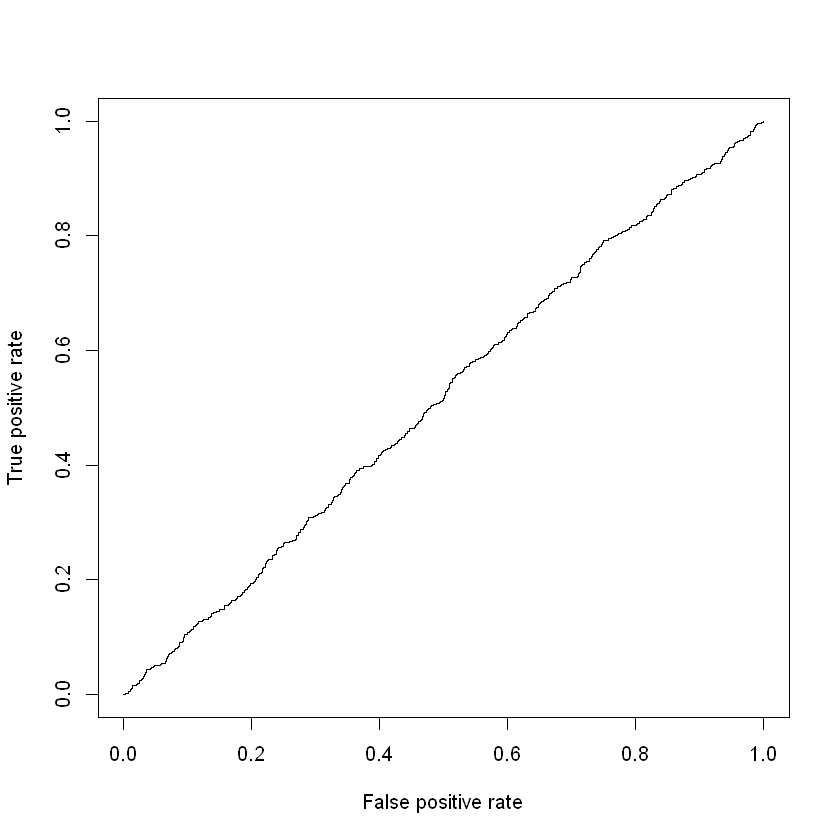

In [220]:
#Prediction and accuracy on validation set
p <- predict(m, newdata= fValidation, type="response")
pr <- prediction(p, Validation$Default_45)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

In [ ]:
#References 
#https://machinelearningmastery.com/data-visualization-in-r/  reference for visualizations
#https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html for WOE and IV
#https://stackoverflow.com/questions/36068963/r-how-to-split-a-data-frame-into-training-validation-and-test-sets    for splitting of data 
#https://www.r-bloggers.com/how-to-perform-a-logistic-regression-in-r/  for logistic regression
# https://rpubs.com/aryn999/DecisionTreeusingR   for decision tree